**AML Assignment 1**

Group members:
- Shubhangi Sanyal (MDS202238)
- Subhashree Saha (MDS202243)
- Samriddha Adhikary (MDS202229)

# Fashion MNIST dataset

## Loading necessary libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import time

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
torch.manual_seed(97)
random.seed(97)
np.random.seed(97)



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
from torch.utils.data import DataLoader, Dataset

# Loading Fashion MNIST Datasets

In [ ]:
input_size  = 28*28   # images are 28x28 pixels
output_size = 10      # there are 10 classes

train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=1000, shuffle=True)

**Showing some training images**

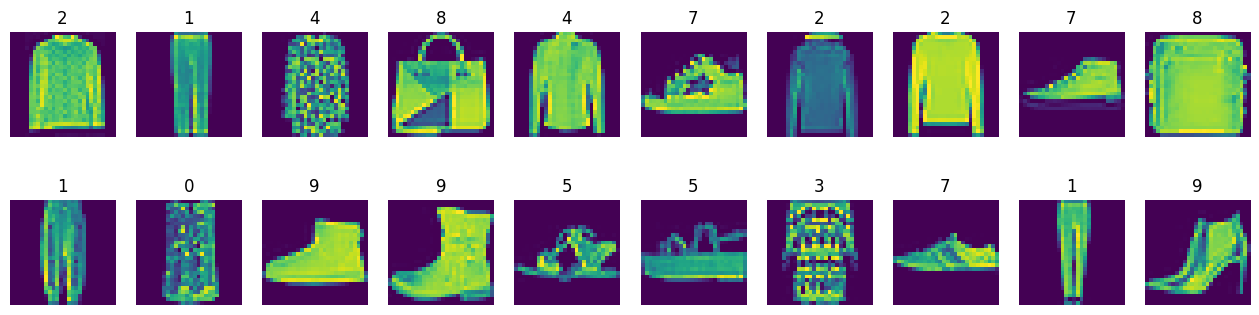

In [ ]:
classNames = [0,1,2,3,4,5,6,7,8,9]
# show some training images
def imshow(img, plot):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()   # convert from tensor
    plot.imshow(np.transpose(npimg, (1, 2, 0)))

# show some training images
plt.figure(figsize=(16, 4))

# fetch a batch of train images; RANDOM
image_batch, label_batch = next(iter(train_loader))

for i in range(20):
    image = image_batch[i]
    label = label_batch[i].item()
    plt.subplot(2, 10, i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    #plt.imshow(image.squeeze().numpy())
    imshow(image,plt)
    plt.axis('off')
    plt.title(classNames[label])

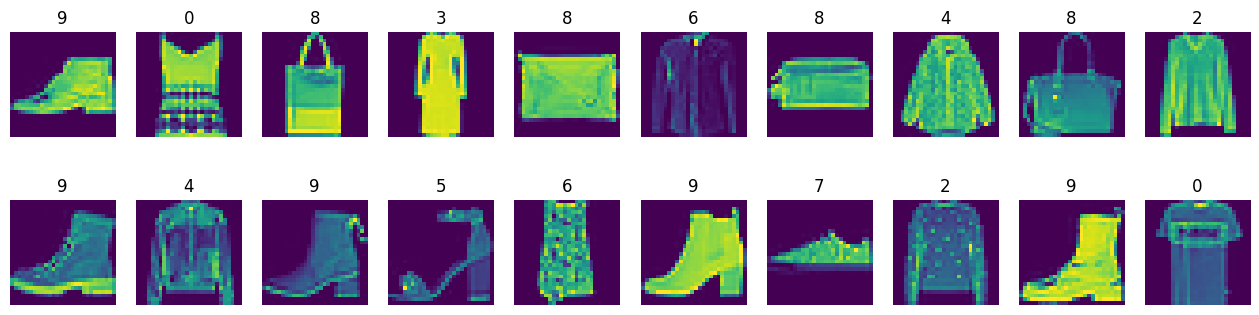

In [ ]:
# show some training images
plt.figure(figsize=(16, 4))

# fetch a batch of train images; RANDOM
image_batch, label_batch = next(iter(train_loader))

for i in range(20):
    image = image_batch[i]
    label = label_batch[i].item()
    plt.subplot(2, 10, i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off')
    plt.title(label)

In the dataset, the labels are anotated by number such as :

0 = T-shirt/top <br>
1 = Trouser <br>
2 = Pullover <br>
3 = Dress <br>
4 = Coat <br>
5 = Sandal <br>
6 = Shirt <br>
7 = Sneaker <br>
8 = Bag <br>
9 = Ankle boot

**Helper functions for training and testing models**

In [ ]:
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

accuracy_list = []
# we pass a model object to this trainer, and it trains this model for one epoch
def train(epoch, model):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        #loss = F.nll_loss(output, target)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)

        output = model(data)
        #test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

# Fully connected Neural Networks
- A 2-hidden layer Fully Connected Neural Network

In [ ]:
class FC2Layer(nn.Module):
    def __init__(self, input_size, output_size):
        super(FC2Layer, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, 50),
            nn.ReLU(),
            nn.Linear(50,50),
            nn.ReLU(),
            nn.Linear(50,30),
            nn.ReLU(),
            nn.Linear(30, output_size),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

In [ ]:
print("Training on ", device)
model_fnn = FC2Layer(input_size, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(), lr=0.1)
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

start_fnn = time.perf_counter()
for epoch in range(0, 10):
    train(epoch, model_fnn)
    test(model_fnn)
stop_fnn = time.perf_counter()
print("DNN runtime: {0:.2f} seconds".format(stop_fnn - start_fnn))

Training on  cuda:0
Number of parameters: 43640
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.315397
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.082750
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.707706
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.570108
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.445669
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.543152
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.474378
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.597875
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.478936
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.461938

Test set: Average loss: 0.4485, Accuracy: 8372/10000 (84%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.317434
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.339389
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.330663
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.329778
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.209318
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.494724
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.303064
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.237601
Tra

In [ ]:
def visualize_pred(img, pred_prob, real_label):
    ''' Function for viewing an image and it's predicted classes.
    '''
    #pred_prob = pred_prob.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    #ax1.imshow(img.numpy().squeeze())
    imshow(img, ax1)
    ax1.axis('off')
    pred_label = np.argmax(pred_prob)
    ax1.set_title([classNames[real_label], classNames[pred_label]])

    ax2.barh(np.arange(10), pred_prob)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Prediction Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()



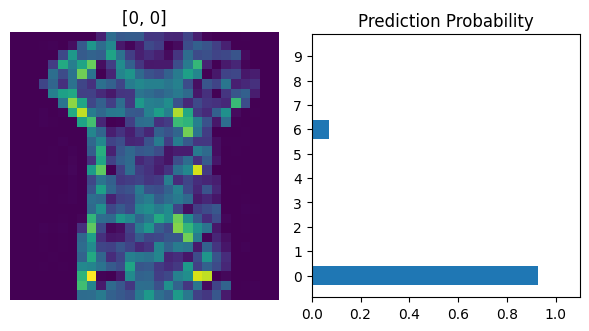

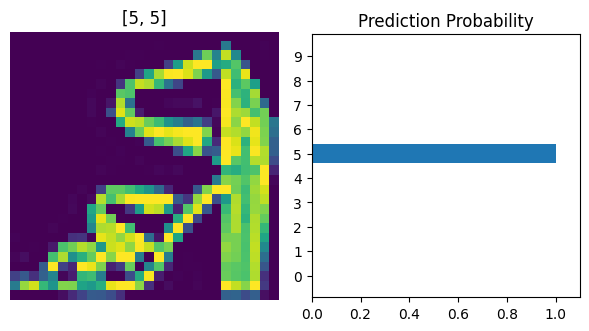

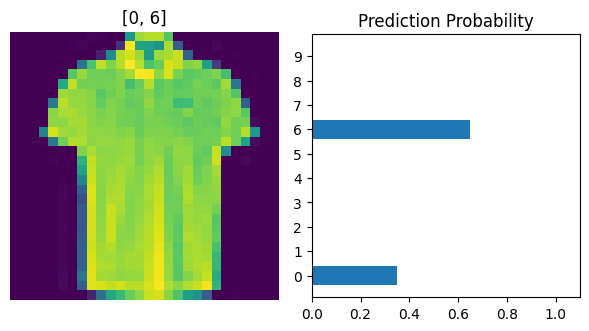

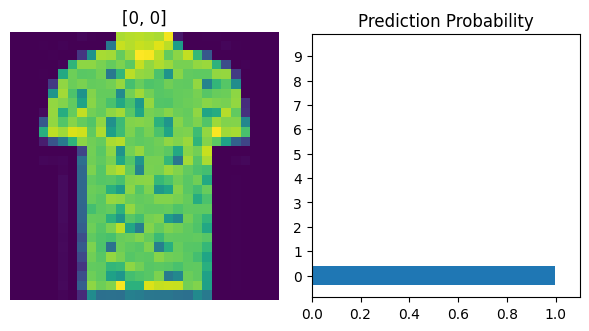

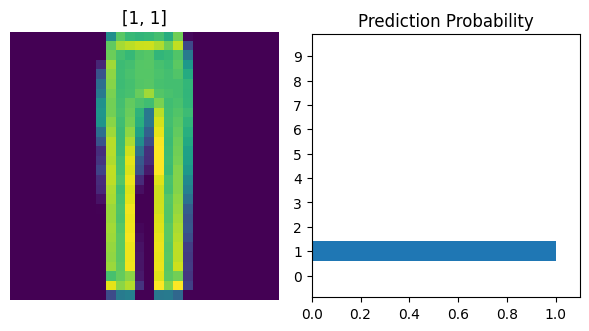

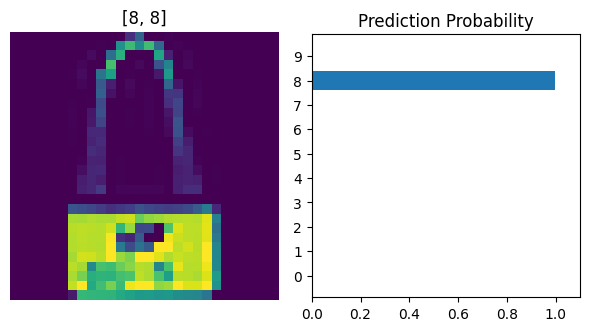

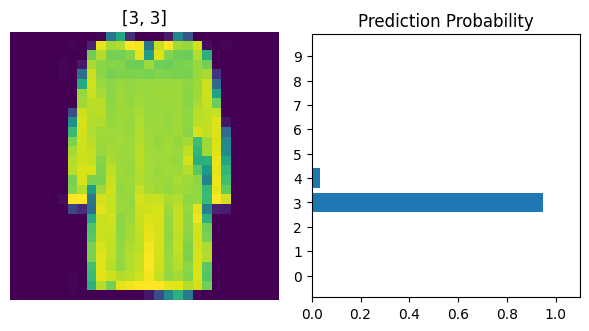

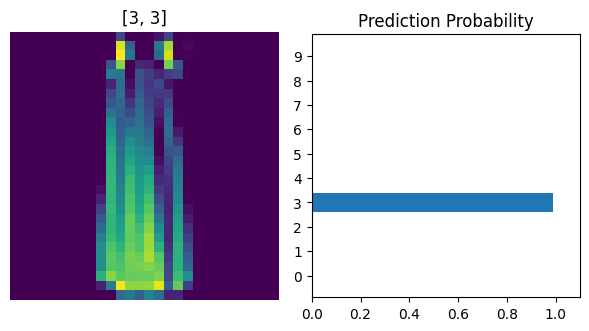

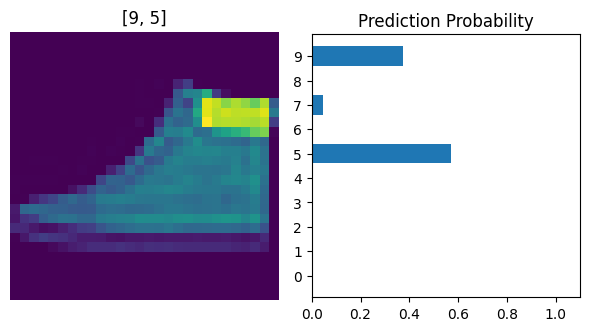

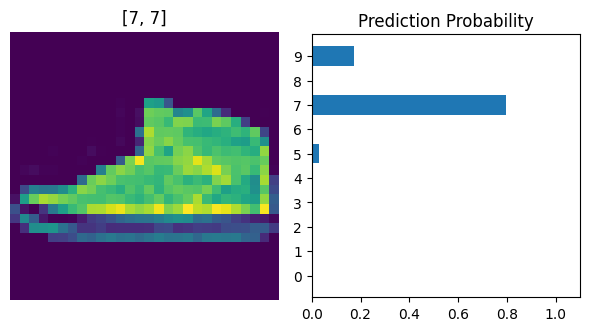

In [ ]:
model_fnn.to('cpu')

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_fnn(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

# Convolution Neural Networks

In [ ]:
class CNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3,padding=0)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=6,padding=0)
        self.conv3 = nn.Conv2d(in_channels=24, out_channels=32, kernel_size=6,padding=0)
        self.fc1 = nn.Linear(8*4*4, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 8*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [ ]:
print("Training on ", device)
model_cnn = CNN(input_size, output_size)
model_cnn.to(device)
optimizer = optim.SGD(model_cnn.parameters(), lr=0.01, momentum=0.9)
print('Number of parameters: {}'.format(get_n_params(model_cnn)))

start_cnn = time.perf_counter()
for epoch in range(0, 10):
    train(epoch, model_cnn)
    test(model_cnn)
stop_cnn = time.perf_counter()
print("CNN runtime: {0:.2f} seconds".format(stop_cnn - start_cnn))

Training on  cuda:0
Number of parameters: 66002
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.292597
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.176255
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.586428
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.736323
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.669920
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.445072
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.428181
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.444358
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.442319
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.663121

Test set: Average loss: 0.4786, Accuracy: 8194/10000 (82%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.496110
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.288503
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.293181
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.340335
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.299302
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.500937
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.492785
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.327191
Tra

In [ ]:
def visualize_pred(img, pred_prob, real_label):
    ''' Function for viewing an image and it's predicted classes.
    '''
    #pred_prob = pred_prob.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.numpy().squeeze())
    ax1.axis('off')
    pred_label = np.argmax(pred_prob)
    ax1.set_title([real_label, pred_label])

    ax2.barh(np.arange(10), pred_prob)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Prediction Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

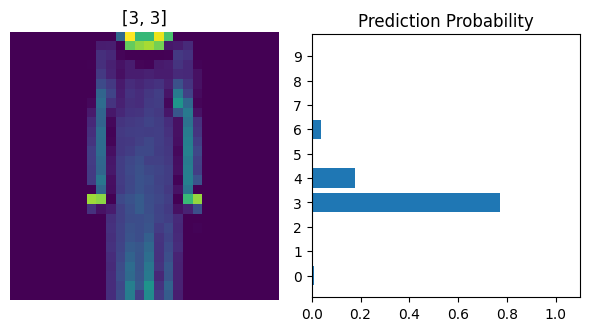

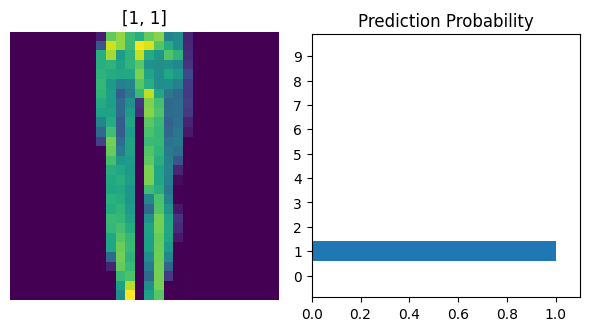

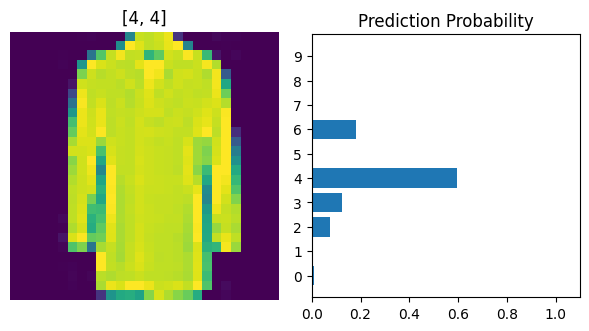

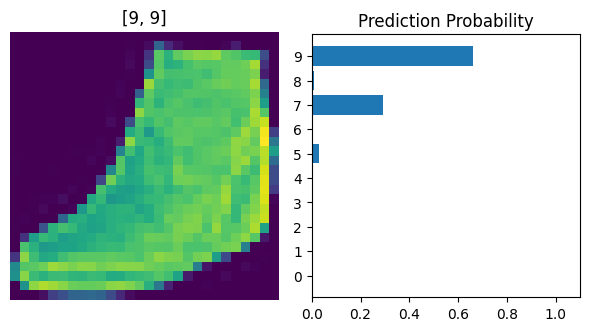

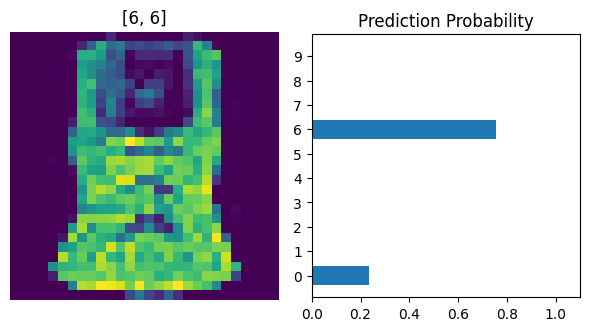

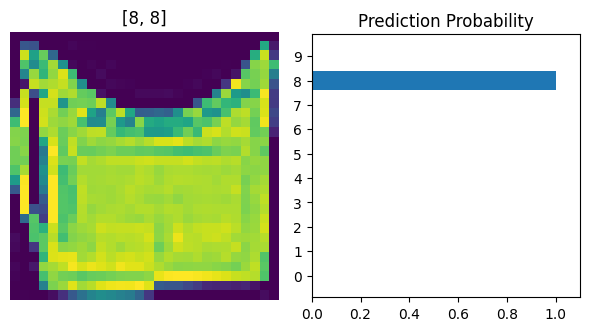

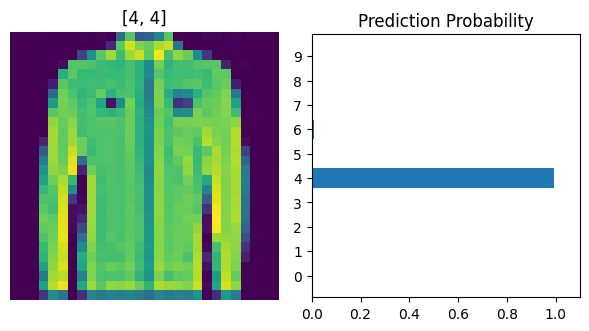

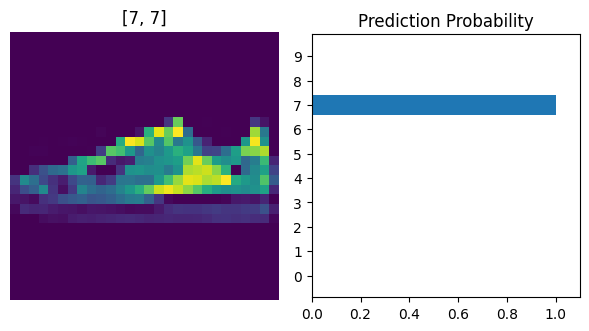

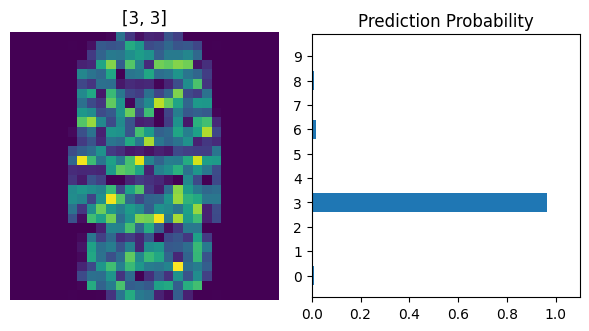

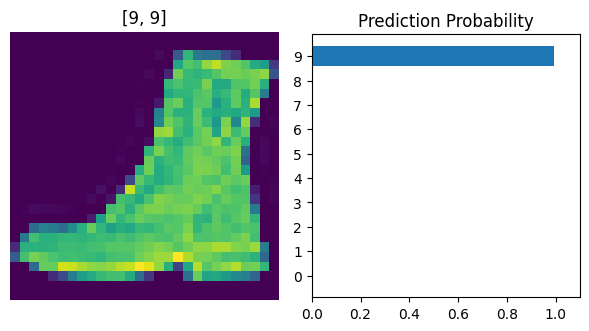

In [ ]:
model_cnn.to('cpu')

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_cnn(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

# Effect of image scrambling on Neural Networks

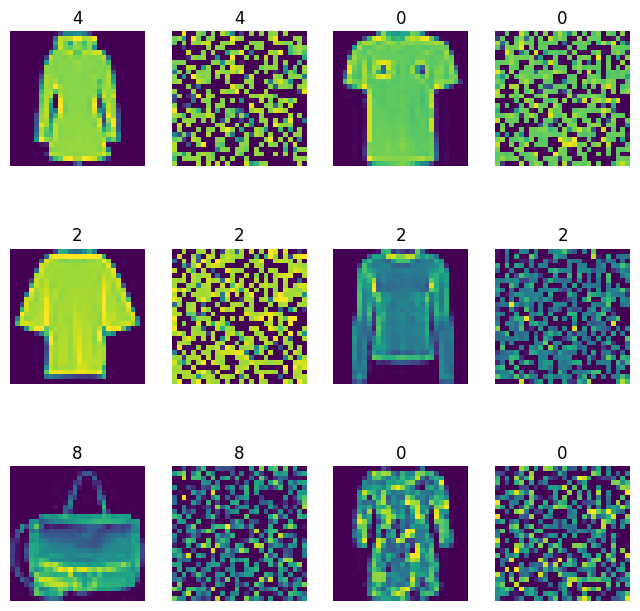

In [ ]:
fixed_perm = torch.randperm(784) # Fix a permutation of the image pixels; We apply the same permutation to all images

# show some training images
plt.figure(figsize=(8, 8))

# fetch a batch of train images; RANDOM
image_batch, label_batch = next(iter(train_loader))

for i in range(6):
    image = image_batch[i]
    image_perm = image.view(-1, 28*28).clone()
    image_perm = image_perm[:, fixed_perm]
    image_perm = image_perm.view(-1, 1, 28, 28)

    label = label_batch[i].item()
    plt.subplot(3,4 , 2*i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off')
    plt.title(label)
    plt.subplot(3, 4, 2*i+2)
    plt.imshow(image_perm.squeeze().numpy())
    plt.axis('off')
    plt.title(label)


In [ ]:
accuracy_list = []

def scramble_train(epoch, model, perm=torch.arange(0, 784).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)

        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def scramble_test(model, perm=torch.arange(0, 784).long()):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)

        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)

        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

## DNN

In [ ]:
print("Training on ", device)
model_fnn_2 = FC2Layer(input_size, output_size)
model_fnn_2.to(device)
optimizer = optim.SGD(model_fnn_2.parameters(), lr=0.1)
print('Number of parameters: {}'.format(get_n_params(model_fnn_2)))

start_fnn1 = time.perf_counter()
for epoch in range(0, 10):
    scramble_train(epoch, model_fnn_2, fixed_perm)
    scramble_test(model_fnn_2, fixed_perm)
stop_fnn1 = time.perf_counter()
print("DNN with scrambling runtime: {0:.2f} seconds".format(stop_fnn1 - start_fnn1))

Training on  cuda:0
Number of parameters: 43640
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.293283
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.796496
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.690426
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.715732
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.353696
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.391374
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.609037
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.348080
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.483950
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.612822

Test set: Average loss: 0.4654, Accuracy: 8330/10000 (83%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.392338
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.440325
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.569652
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.496545
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.459702
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.623385
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.516386
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.427532
Tra

**Performance increased from 85% to 87%**

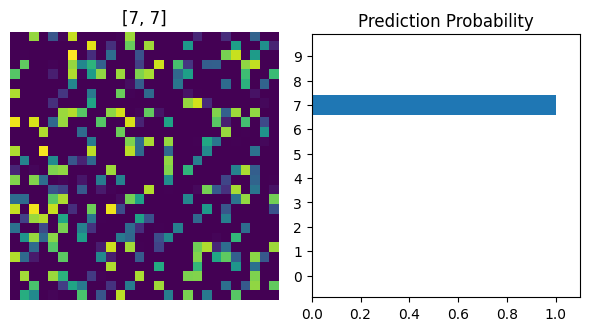

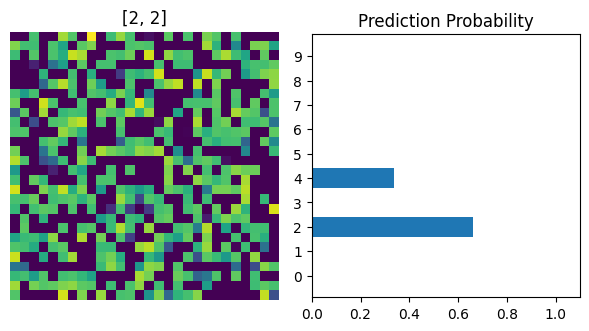

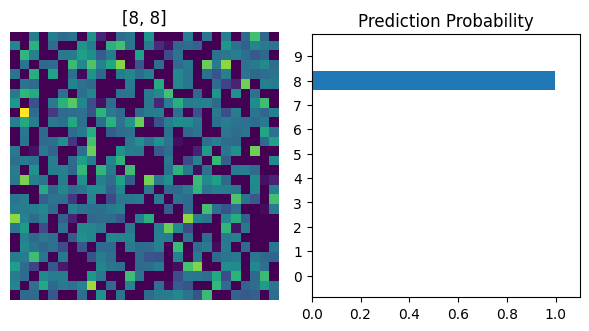

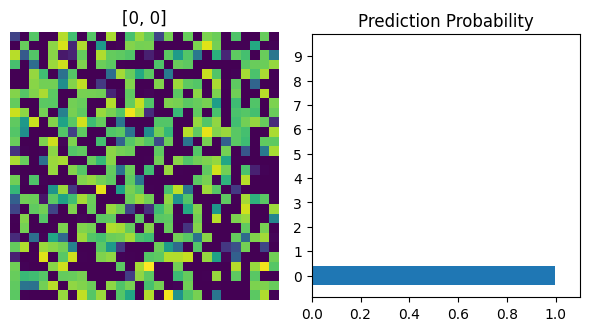

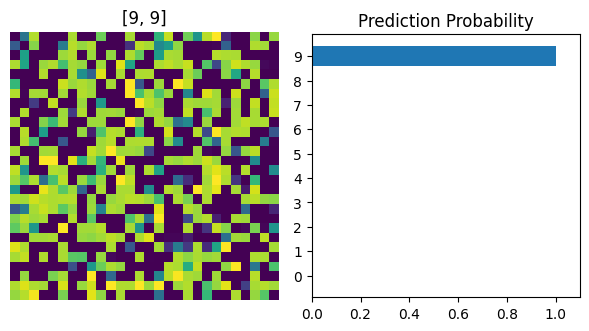

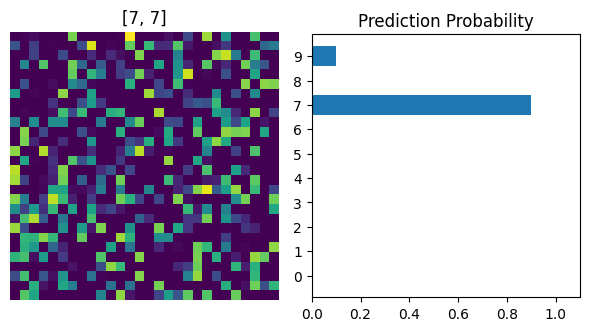

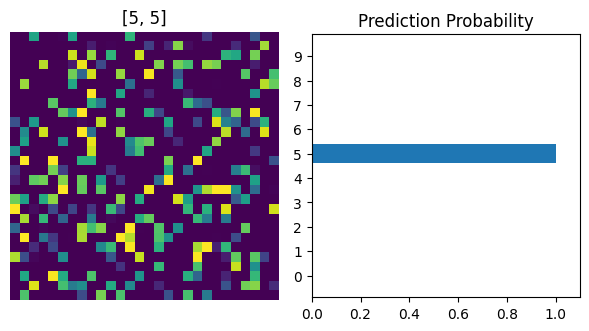

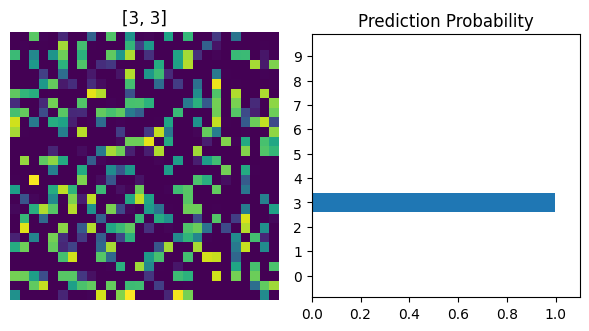

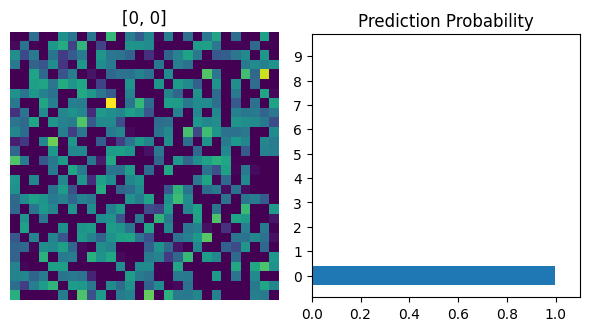

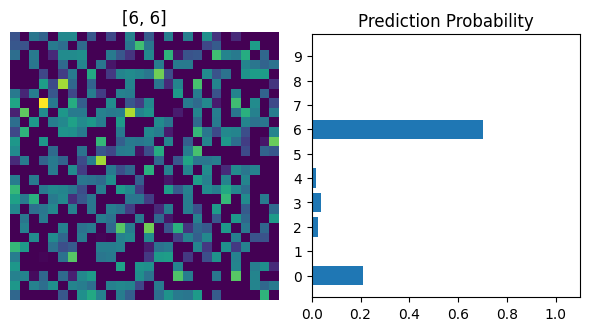

In [ ]:
model_fnn_2.to('cpu')

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))
image_batch_scramble = image_batch.view(-1, 28*28)
image_batch_scramble = image_batch_scramble[:, fixed_perm]
image_batch_scramble = image_batch_scramble.view(-1, 1, 28, 28)
# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_fnn_2(image_batch_scramble)
for i in range(10):
    img = image_batch[i]
    img_perm = image_batch_scramble[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img_perm, pred_prob, real_label)

## CNN

In [ ]:
print("Training on ", device)
model_cnn_3 = CNN(input_size, output_size)
model_cnn_3.to(device)
optimizer = optim.SGD(model_cnn_3.parameters(), lr=0.01, momentum=0.9)
print('Number of parameters: {}'.format(get_n_params(model_cnn_3)))

start_cnn1 = time.perf_counter()
for epoch in range(0, 10):
    scramble_train(epoch, model_cnn_3, fixed_perm)
    scramble_test(model_cnn_3, fixed_perm)
stop_cnn1 = time.perf_counter()
print("CNN with scrambling runtime: {0:.2f} seconds".format(stop_cnn1 - start_cnn1))

Training on  cuda:0
Number of parameters: 66002
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.304104
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.860708
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.603366
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.569797
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.384461
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.353262
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.426824
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.652870
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.414395
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.629470

Test set: Average loss: 0.4370, Accuracy: 8411/10000 (84%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.144533
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.383348
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.376330
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.418313
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.408676
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.191066
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.253090
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.446708
Tra

**Performance decreased from 88% to 86%**

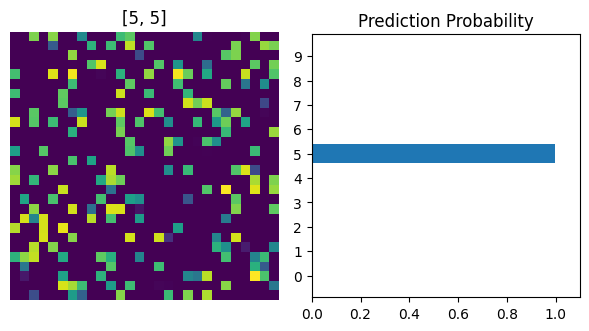

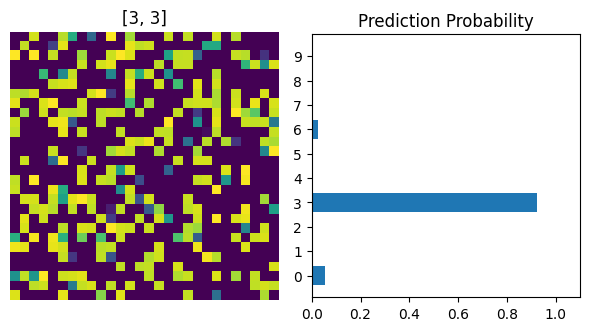

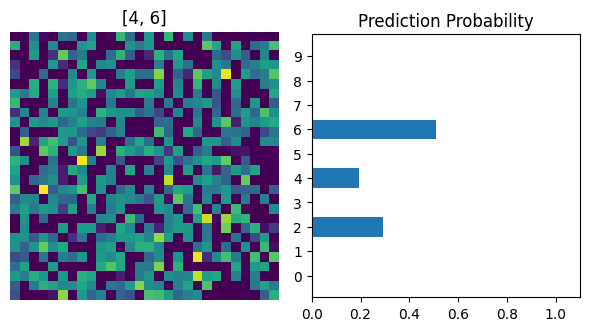

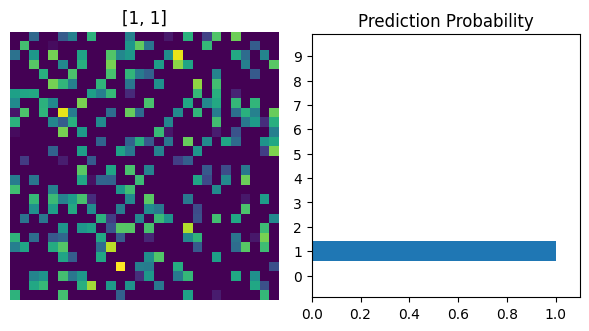

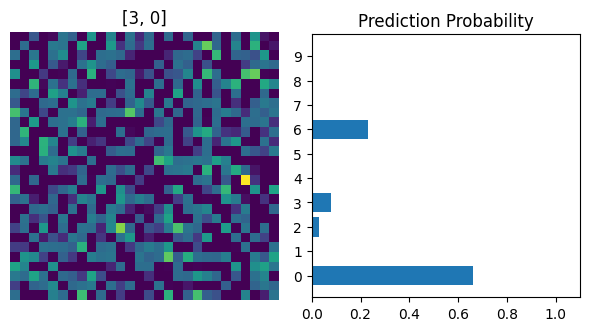

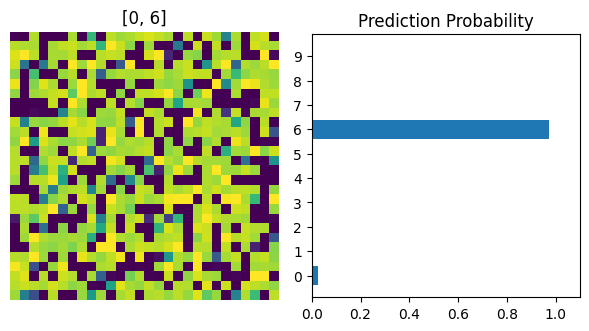

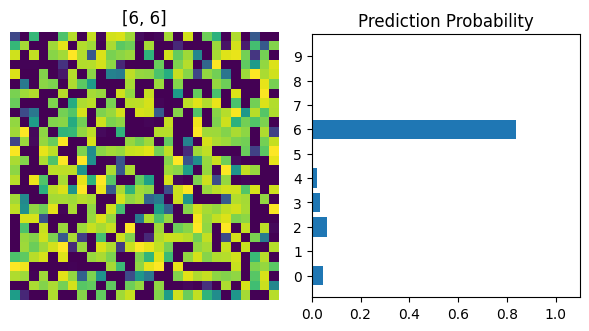

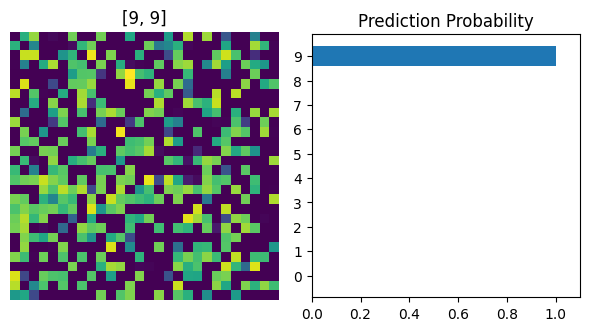

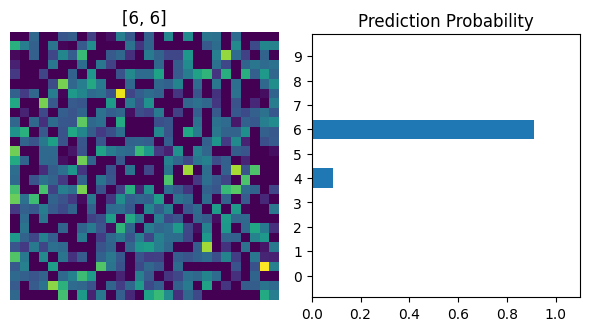

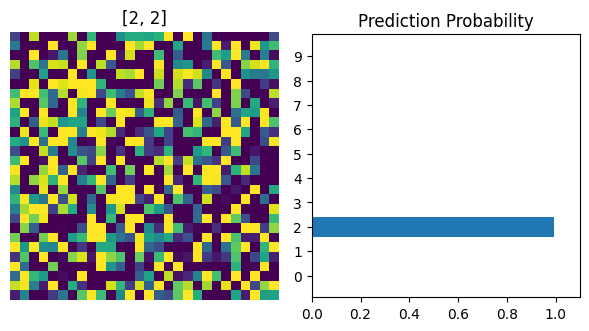

In [ ]:
model_cnn_3.to('cpu')

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))
image_batch_scramble = image_batch.view(-1, 28*28)
image_batch_scramble = image_batch_scramble[:, fixed_perm]
image_batch_scramble = image_batch_scramble.view(-1, 1, 28, 28)
# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_cnn_3(image_batch_scramble)
for i in range(10):
    img = image_batch[i]
    img_perm = image_batch_scramble[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img_perm, pred_prob, real_label)

# FGSM

In [ ]:
epsilons = [0, 0.001, 0.002, 0.004, 0.008, 0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.3]
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image using the gradients
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [-1,1] range
    perturbed_image = torch.clamp(perturbed_image, -1, 1)
    #perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

In [ ]:
def fgsm_test( model, device, test_loader, epsilon ):
    # Accuracy counter
    correct = 0
    adv_examples = []

    model.to(device)
    model.eval()

    progress_count = 0;
    # Loop over all examples in test set, one by one (test_loader has batch_size=1)
    for data, target in test_loader:
        progress_count+= 1

        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Zero all existing gradients
        model.zero_grad()
        # Forward pass the data through the model
        output = model(data)
        # Calculate the loss
        loss = F.nll_loss(output, target)
        # Calculate gradients of model in backward pass
        loss.backward()

        for i in range(len(target)):

        # Forward pass the data through the model
           # output = model(data)
            init_pred = output[i].max(0, keepdim=True)[1].squeeze() # get the index of the max log-probability
        #print(init_pred)

        # If the model is wrong, then this can't be an adversarial example, move on to the next example
            if init_pred.item() != target[i].item():
                continue

#         Calculate the loss
#             loss = F.nll_loss(output, target)
#          Calculate gradients of model in backward pass
#             loss.backward()
        # Collect gradients of the data
            data_grad = data.grad.data

        # Call FGSM Attack
            perturbed_data = fgsm_attack(data, epsilon, data_grad)
            perturbed_data = perturbed_data.to(device)

        # Apply the model to the perturbed image
            output = model(perturbed_data)
            final_pred = output[i].max(0, keepdim=True)[1] # get the index of the max log-probability

        # check if the perturbation forces a misclassification
            if final_pred.item() != target[i].item():
            # Save some adv examples for visualization later
                if len(adv_examples) < 10:
                    adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                    real_im = data.squeeze().detach().cpu().numpy()
                    adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex, real_im) )
            else:
                correct+= 1

            if progress_count % 1000 == 0:
                print('FGSM Attack Iteration: {}'.format(progress_count * len(data)))
            #print(init_pred.cpu().item(), target.cpu().item())

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(test_loader)*1000)
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct, len(test_loader)*1000, final_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

## FGSM for CNN

In [ ]:
accuracies = [] #list of accuracies
adv_examples = []

# Run test for each epsilon
for eps in epsilons:
    acc, ex = fgsm_test(model_cnn, device, test_loader, eps)
    accuracies.append(acc)
    adv_examples.append(ex)

Epsilon: 0	Test Accuracy = 8424 / 10000 = 0.8424
Epsilon: 0.001	Test Accuracy = 8405 / 10000 = 0.8405
Epsilon: 0.002	Test Accuracy = 8380 / 10000 = 0.838
Epsilon: 0.004	Test Accuracy = 8320 / 10000 = 0.832
Epsilon: 0.008	Test Accuracy = 8194 / 10000 = 0.8194
Epsilon: 0.01	Test Accuracy = 8132 / 10000 = 0.8132
Epsilon: 0.02	Test Accuracy = 7778 / 10000 = 0.7778
Epsilon: 0.04	Test Accuracy = 6951 / 10000 = 0.6951
Epsilon: 0.08	Test Accuracy = 4947 / 10000 = 0.4947
Epsilon: 0.1	Test Accuracy = 4037 / 10000 = 0.4037
Epsilon: 0.2	Test Accuracy = 1845 / 10000 = 0.1845
Epsilon: 0.3	Test Accuracy = 1149 / 10000 = 0.1149


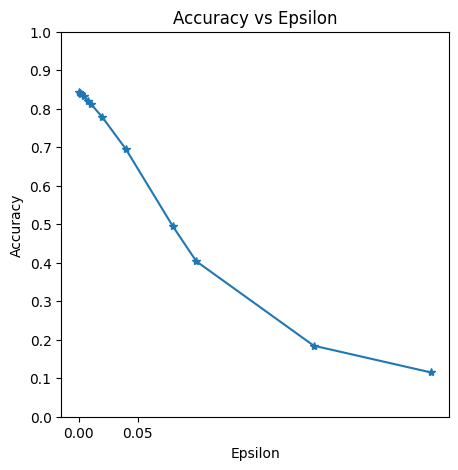

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .1, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

## FGSM for DNN

In [ ]:
accuracies = [] #list of accuracies
adv_examples = []

# Run test for each epsilon
for eps in epsilons:
    acc, ex = fgsm_test(model_fnn, device, test_loader, eps)
    accuracies.append(acc)
    adv_examples.append(ex)

Epsilon: 0	Test Accuracy = 8092 / 10000 = 0.8092
Epsilon: 0.001	Test Accuracy = 8071 / 10000 = 0.8071
Epsilon: 0.002	Test Accuracy = 8046 / 10000 = 0.8046
Epsilon: 0.004	Test Accuracy = 7985 / 10000 = 0.7985
Epsilon: 0.008	Test Accuracy = 7855 / 10000 = 0.7855
Epsilon: 0.01	Test Accuracy = 7788 / 10000 = 0.7788
Epsilon: 0.02	Test Accuracy = 7410 / 10000 = 0.741
Epsilon: 0.04	Test Accuracy = 6550 / 10000 = 0.655
Epsilon: 0.08	Test Accuracy = 5137 / 10000 = 0.5137
Epsilon: 0.1	Test Accuracy = 4449 / 10000 = 0.4449
Epsilon: 0.2	Test Accuracy = 1860 / 10000 = 0.186
Epsilon: 0.3	Test Accuracy = 836 / 10000 = 0.0836


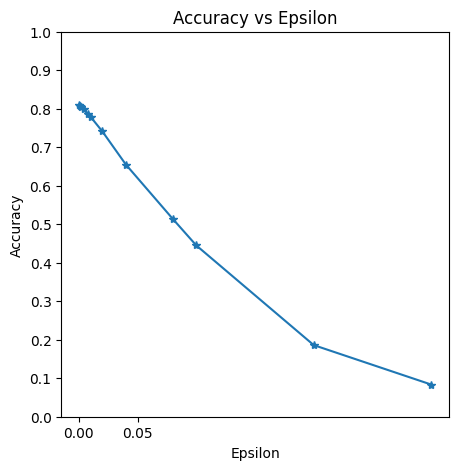

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .1, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

# Sign Language MNIST dataset

## Importing dataset from Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubhangisanyal","key":"1a7b110f09e00ab74aec82e1a1edc14d"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download datamunge/sign-language-mnist

 99% 62.0M/62.6M [00:00<00:00, 169MB/s]
100% 62.6M/62.6M [00:00<00:00, 149MB/s]


In [ ]:
! unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


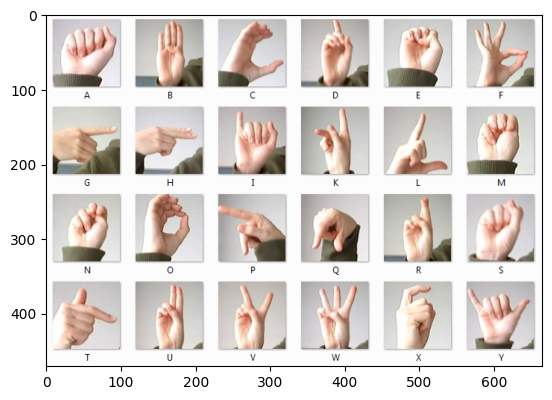

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread("amer_sign2.png")
plt.imshow(image)
plt.show()

## Loading necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

'''
import os
for dirname, _, filenames in os.walk('/kaggle/input/fashionmnist'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
torch.manual_seed(98)
random.seed(98)
np.random.seed(98)
from torch.utils.data import DataLoader, Dataset


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [ ]:
class TrainMNIST(Dataset):

    def __init__(self, file_path, transform=None):
        self.data = pd.read_csv(file_path)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # load image as ndarray type (Height * Width * Channels)
        # be carefull for converting dtype to np.uint8 [Unsigned integer (0 to 255)]
        # in this example, we use ToTensor(), so we define the numpy array like (H, W, C)
        image = self.data.iloc[index, 1:].values.astype(np.uint8).reshape((28, 28, 1))
        label = self.data.iloc[index, 0]

        if self.transform is not None:
            image = self.transform(image)

        return image, label

In [ ]:
class TestMNIST(Dataset):

    def __init__(self, file_path, transform=None):
        self.data = pd.read_csv(file_path)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # load image as ndarray type (Height * Width * Channels)
        # be carefull for converting dtype to np.uint8 [Unsigned integer (0 to 255)]
        # in this example, we use ToTensor(), so we define the numpy array like (H, W, C)
        image = self.data.iloc[index, 1:].values.astype(np.uint8).reshape((28, 28, 1))
        label = self.data.iloc[index, 0]


        if self.transform is not None:
            image = self.transform(image)

        return image, label

In [ ]:
input_size  = 28*28   # images are 28x28 pixels
output_size = 26 # no. of classes

train_data = TrainMNIST('/content/sign_mnist_train.csv',transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
test_data = TestMNIST('/content/sign_mnist_test.csv', transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

In [ ]:
# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64,
     num_workers=0,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1000,
    num_workers=0,shuffle=True)

classNames = list(range(0,26))
#+list(range(10,26))

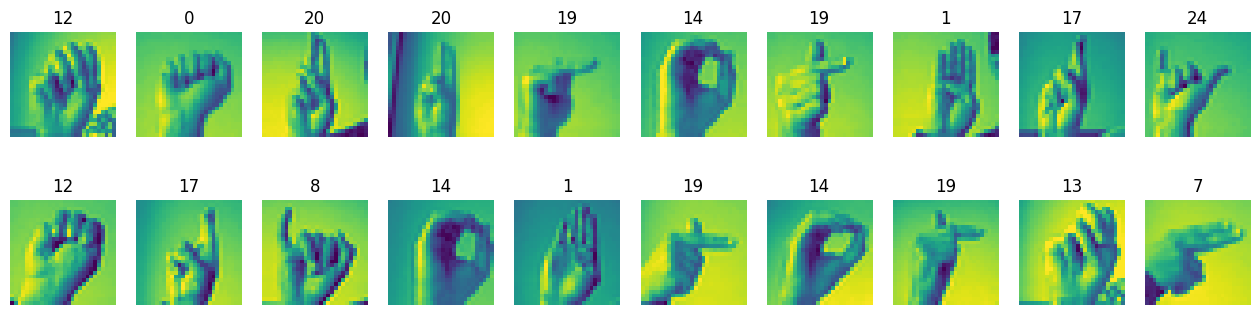

In [ ]:
classNames = list(range(0,26))
# show some training images
def imshow(img, plot):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()   # convert from tensor
    plot.imshow(np.transpose(npimg, (1, 2, 0)))

# show some training images
plt.figure(figsize=(16, 4))

# fetch a batch of train images; RANDOM
image_batch, label_batch = next(iter(train_loader))

for i in range(20):
    image = image_batch[i]
    label = label_batch[i].item()
    plt.subplot(2, 10, i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    #plt.imshow(image.squeeze().numpy())
    imshow(image,plt)
    plt.axis('off')
    plt.title(classNames[label])

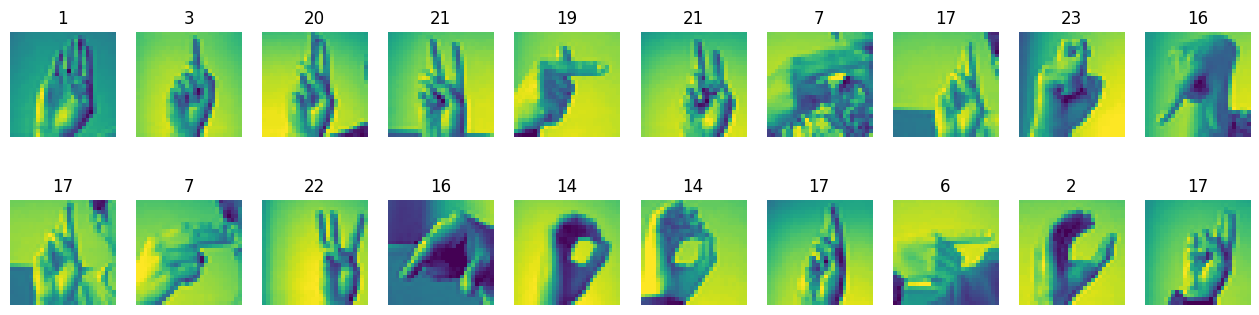

In [ ]:
plt.figure(figsize=(16, 4))

# fetch a batch of train images; RANDOM
image_batch, label_batch = next(iter(train_loader))

for i in range(20):
    image = image_batch[i]
    label = label_batch[i].item()
    plt.subplot(2, 10, i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off')
    plt.title(label)

## Helper functions for training and testing the neural networks

In [ ]:
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

accuracy_list = []
# we pass a model object to this trainer, and it trains this model for one epoch
def train(epoch, model):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        #loss = F.nll_loss(output, target)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)

        output = model(data)
        #test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

## DNN

In [ ]:
class FC2Layer(nn.Module):
    def __init__(self, input_size, output_size):
        super(FC2Layer, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, 50),
            nn.ReLU(),
            nn.Linear(50,50),
            nn.ReLU(),
            nn.Linear(50,30),
            nn.ReLU(),
            nn.Linear(30, output_size),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

In [ ]:
print("Training on ", device)
model_fnn = FC2Layer(input_size, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(), lr=0.1)
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

start_fnn = time.perf_counter()
for epoch in range(0, 10):
    train(epoch, model_fnn)
    test(model_fnn)
stop_fnn = time.perf_counter()
print("DNN runtime: {0:.2f} seconds".format(stop_fnn - start_fnn))

Training on  cuda:0
Number of parameters: 44136
Train Epoch: 0 [0/27455 (0%)]	Loss: 3.239727
Train Epoch: 0 [6400/27455 (23%)]	Loss: 3.378960
Train Epoch: 0 [12800/27455 (47%)]	Loss: 2.922307
Train Epoch: 0 [19200/27455 (70%)]	Loss: 2.949239
Train Epoch: 0 [25600/27455 (93%)]	Loss: 2.579317

Test set: Average loss: 2.4428, Accuracy: 1511/7172 (21%)

Train Epoch: 1 [0/27455 (0%)]	Loss: 2.572129
Train Epoch: 1 [6400/27455 (23%)]	Loss: 2.675598
Train Epoch: 1 [12800/27455 (47%)]	Loss: 1.733339
Train Epoch: 1 [19200/27455 (70%)]	Loss: 2.327084
Train Epoch: 1 [25600/27455 (93%)]	Loss: 1.722418

Test set: Average loss: 1.7478, Accuracy: 3153/7172 (44%)

Train Epoch: 2 [0/27455 (0%)]	Loss: 1.397813
Train Epoch: 2 [6400/27455 (23%)]	Loss: 2.161604
Train Epoch: 2 [12800/27455 (47%)]	Loss: 2.069420
Train Epoch: 2 [19200/27455 (70%)]	Loss: 1.777180
Train Epoch: 2 [25600/27455 (93%)]	Loss: 1.314372

Test set: Average loss: 1.8825, Accuracy: 2749/7172 (38%)

Train Epoch: 3 [0/27455 (0%)]	Loss: 1.51

**Visualizing results**

In [ ]:
def visualize_pred(img, pred_prob, real_label):
    ''' Function for viewing an image and it's predicted classes.
    '''
    #pred_prob = pred_prob.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    #ax1.imshow(img.numpy().squeeze())
    imshow(img, ax1)
    ax1.axis('off')
    pred_label = np.argmax(pred_prob)
    ax1.set_title([classNames[real_label], classNames[pred_label]])

    ax2.barh(np.arange(26), pred_prob)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(26))
    ax2.set_yticklabels(np.arange(26))
    ax2.set_title('Prediction Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

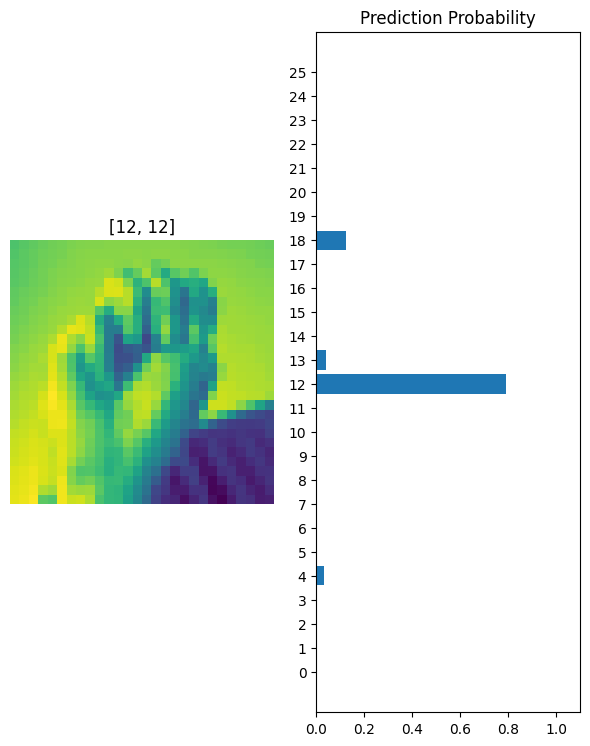

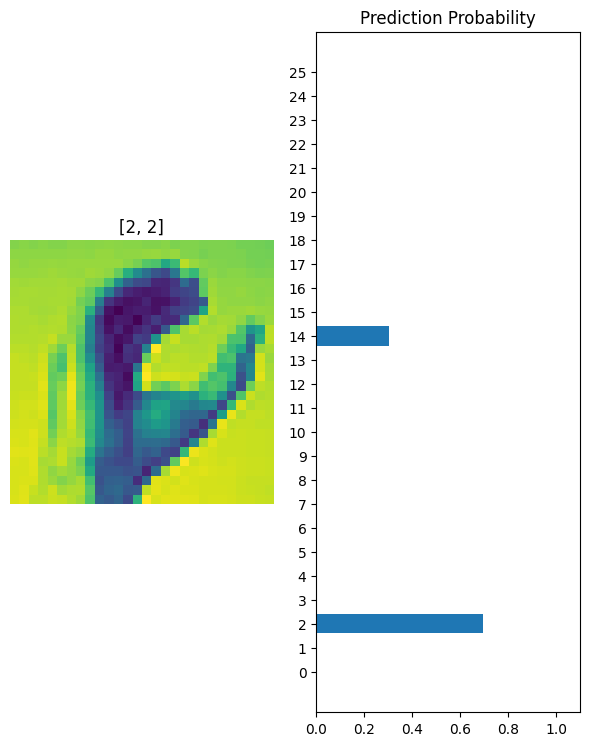

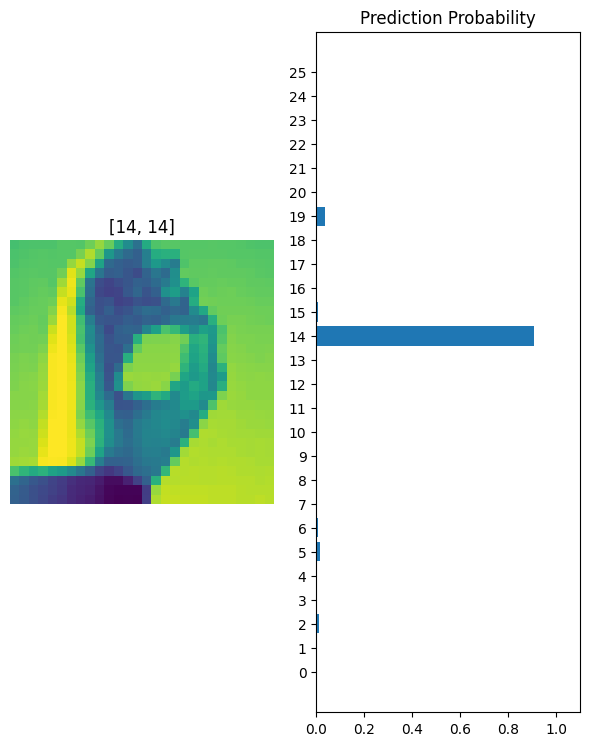

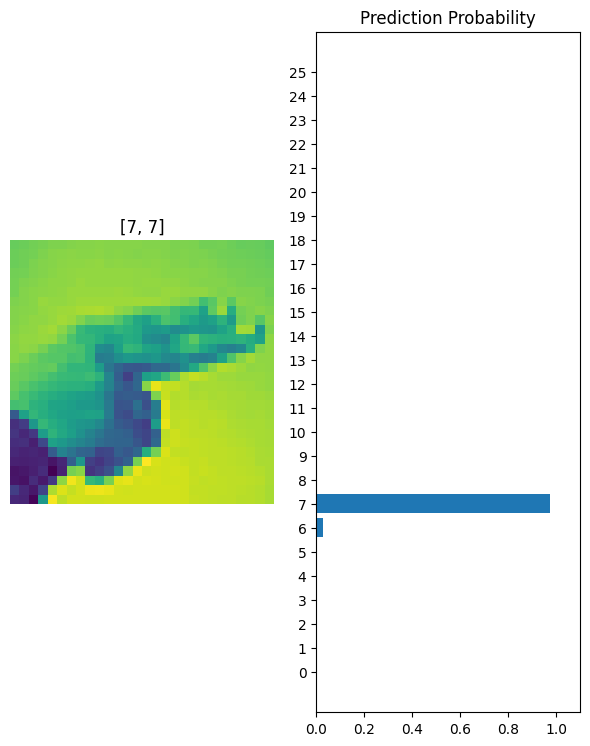

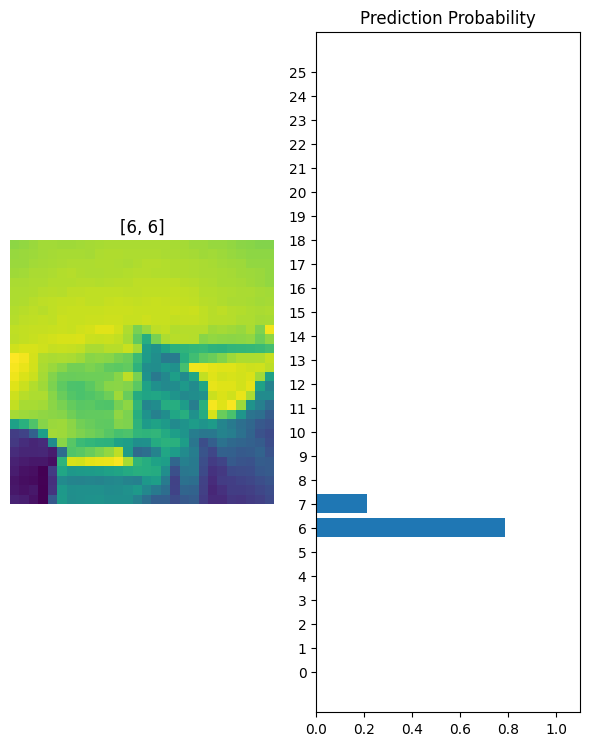

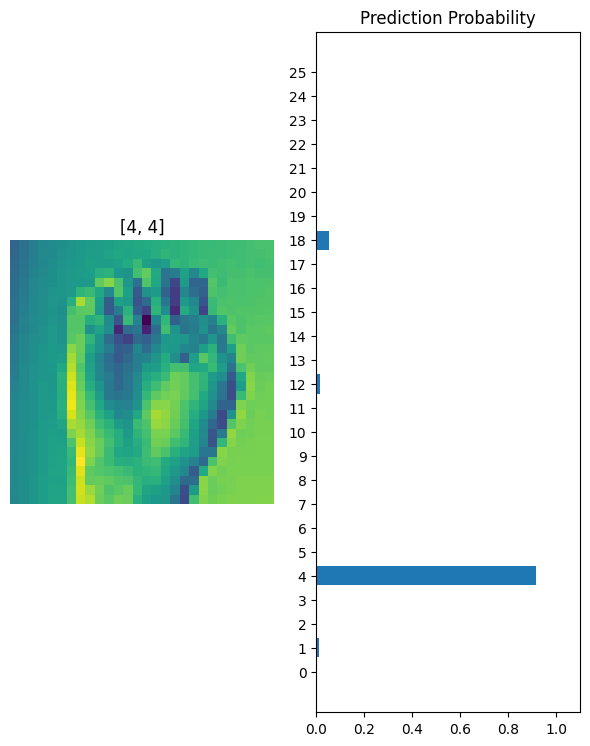

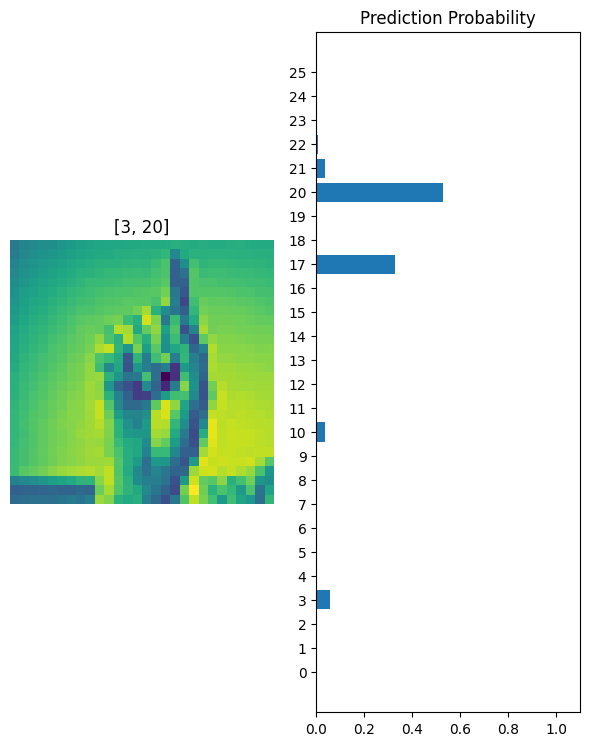

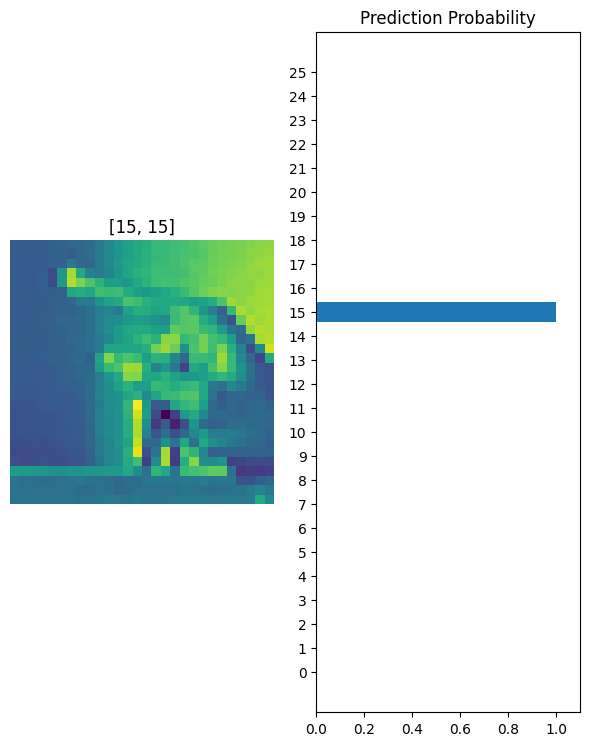

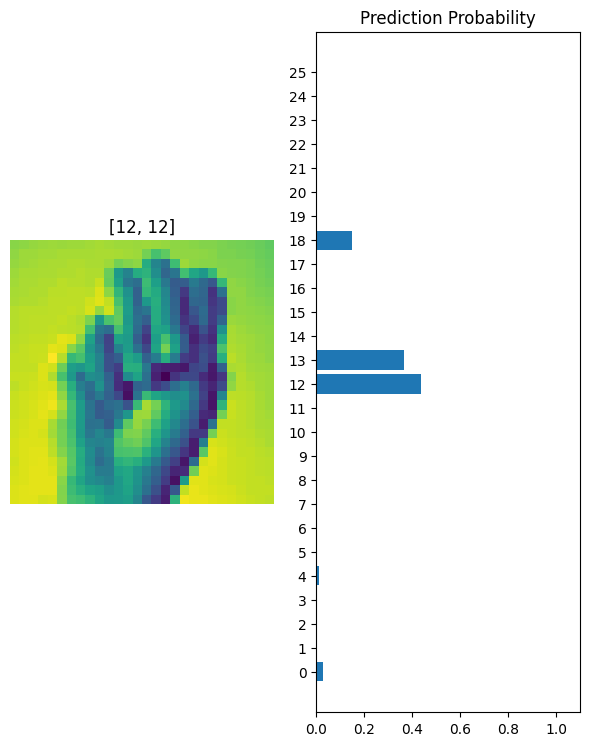

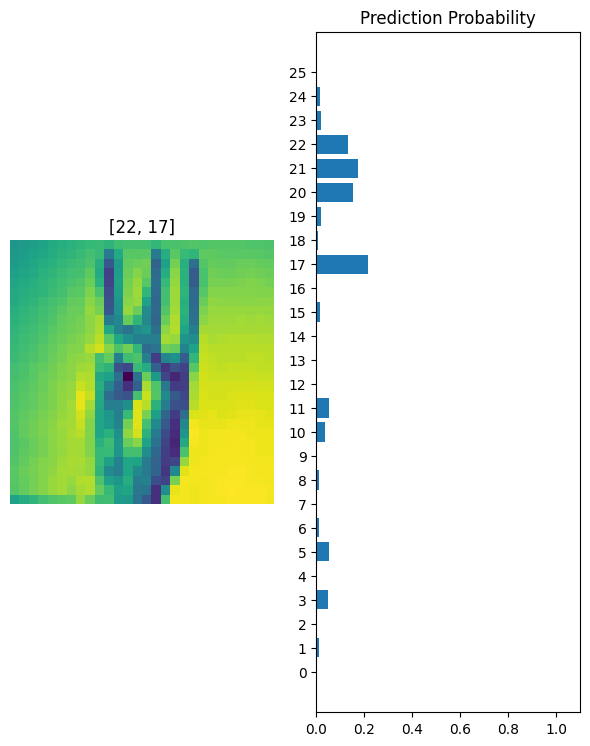

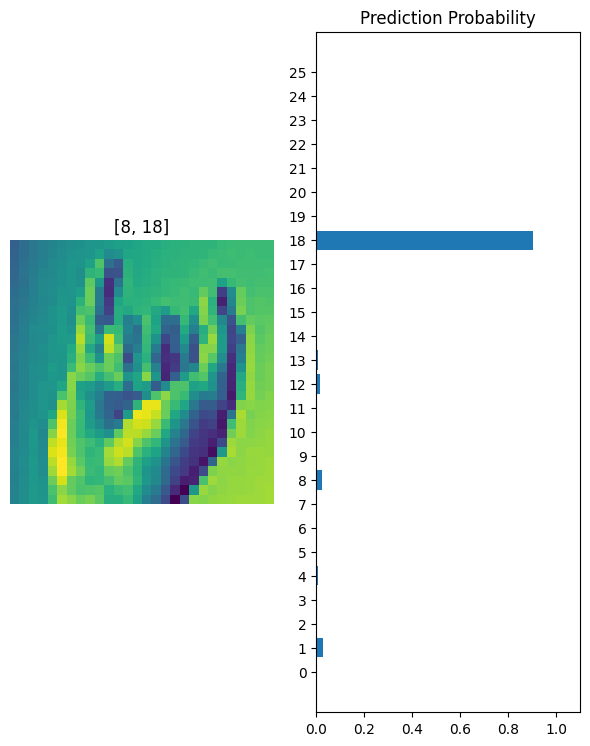

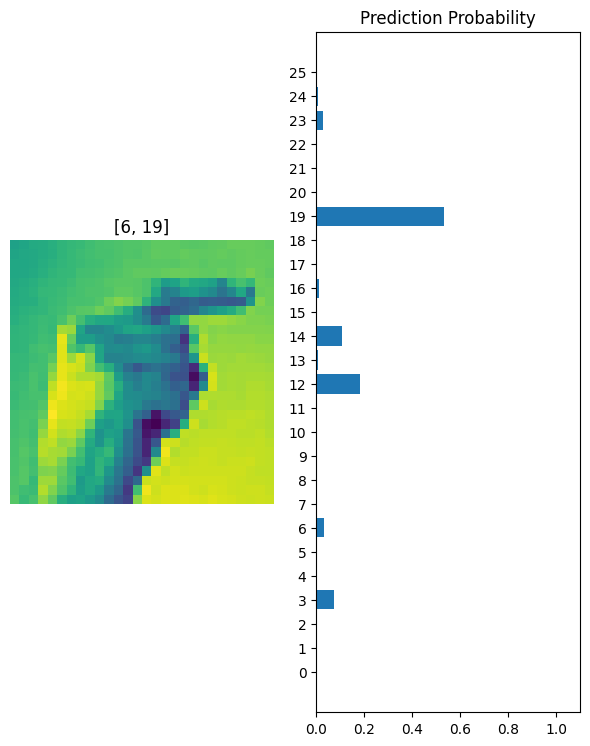

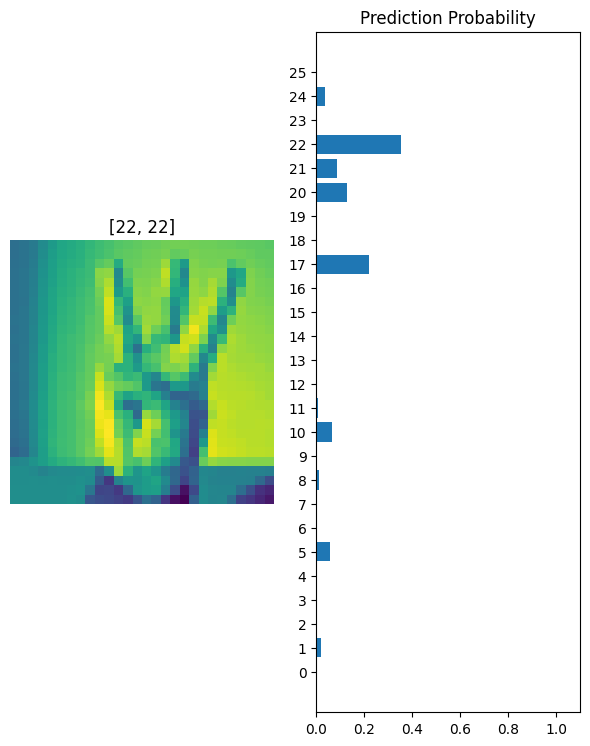

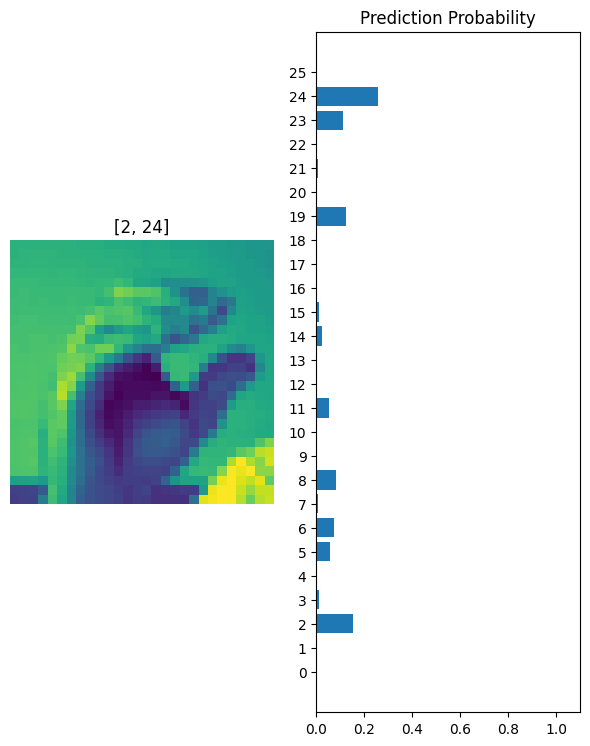

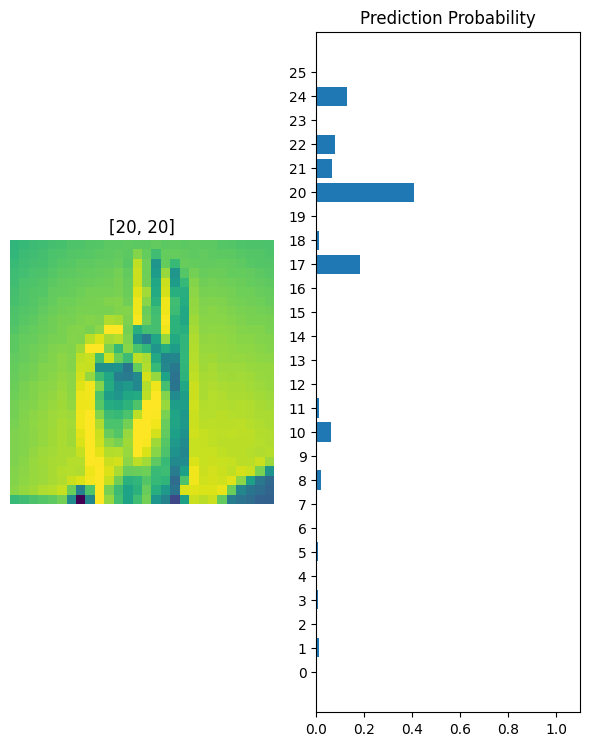

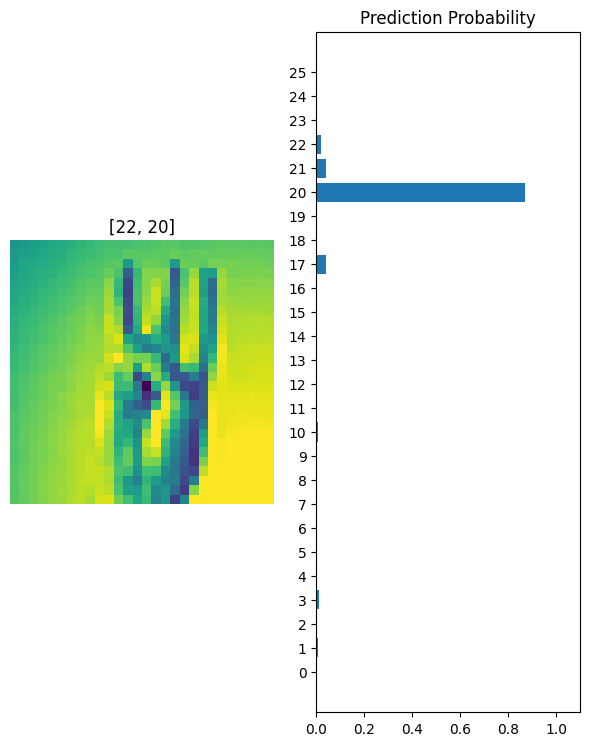

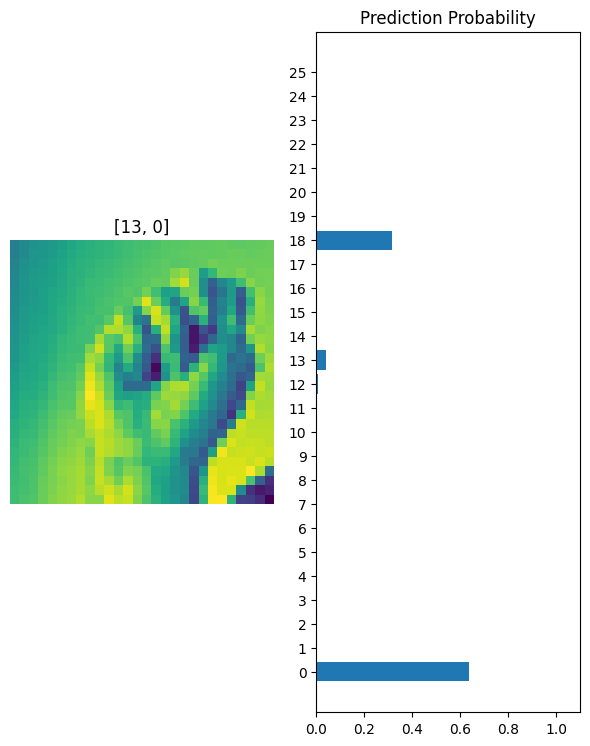

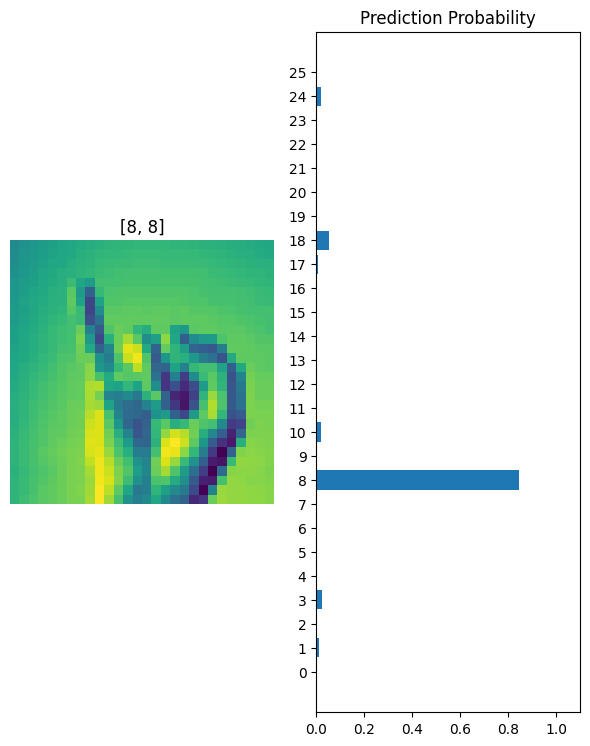

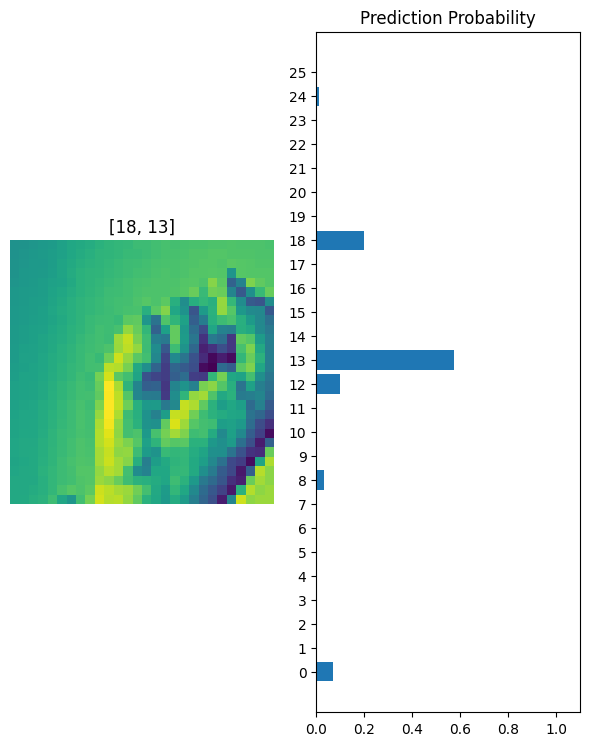

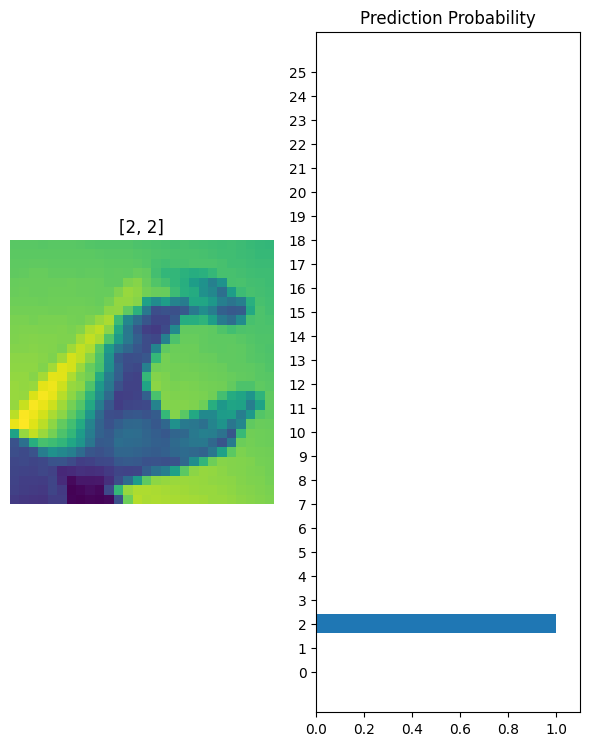

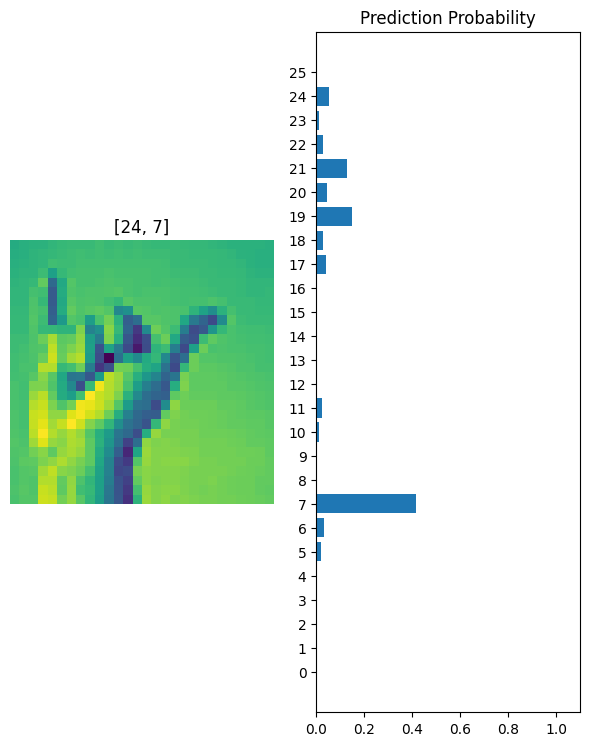

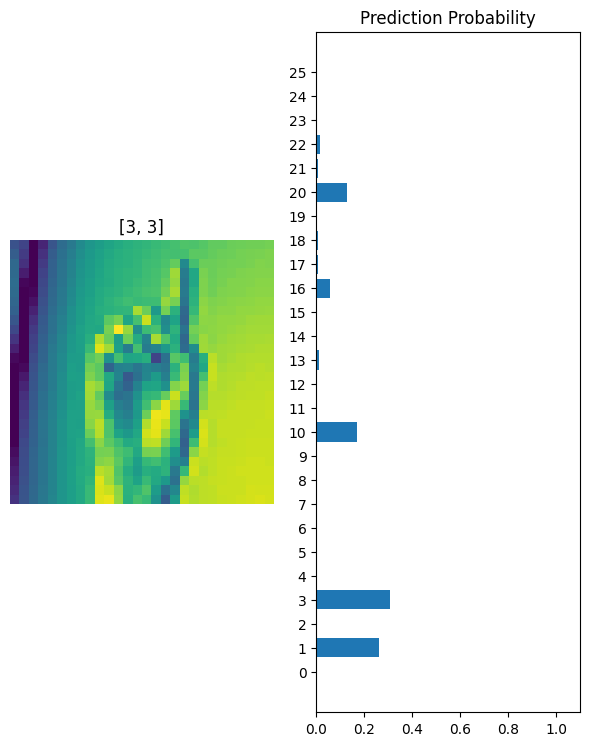

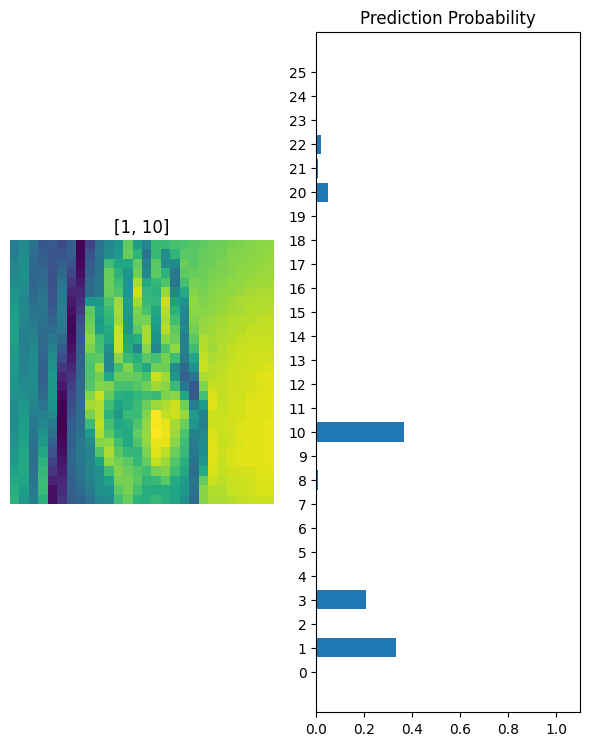

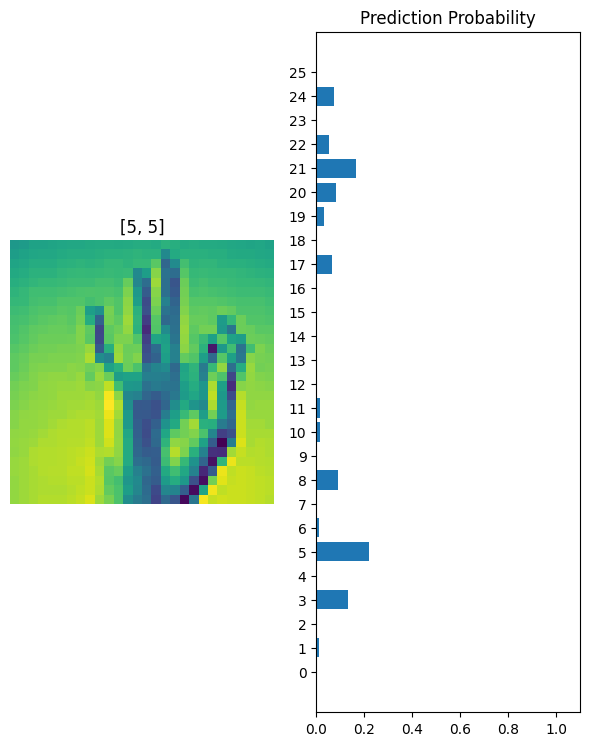

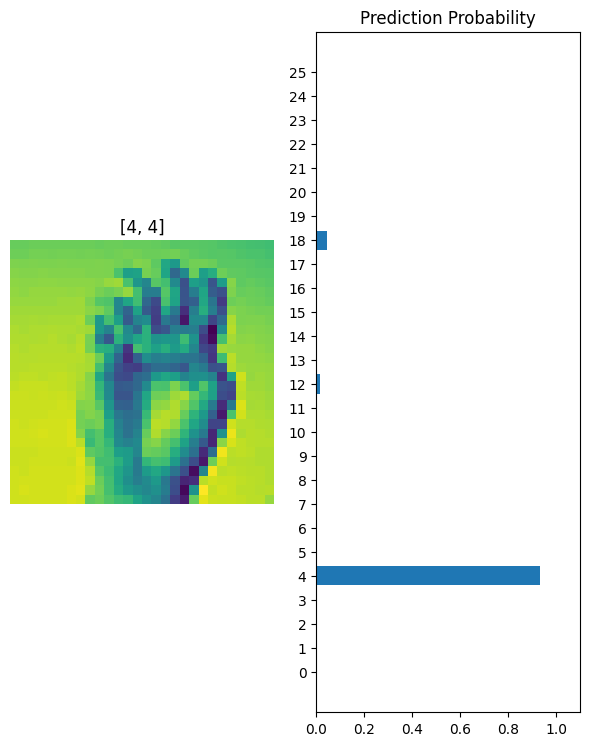

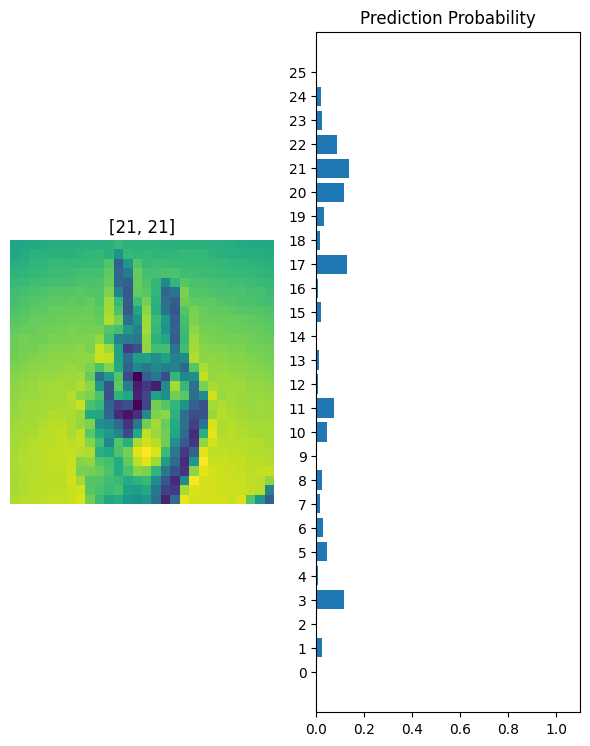

In [ ]:
model_fnn.to('cpu')

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_fnn(image_batch)
for i in range(26):
    img = image_batch[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

## CNN

In [ ]:
class CNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3,padding=0)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3,padding=1)
        self.conv3 = nn.Conv2d(in_channels=24, out_channels=32, kernel_size=3,padding=0)
        self.fc1 = nn.Linear(32*4*4, 200)
        self.fc2 = nn.Linear(200, 26)

    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv3(x)
        x = F.relu(x)
        #x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 32*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [ ]:
print("Training on ", device)
model_cnn = CNN(input_size, output_size)
model_cnn.to(device)
optimizer = optim.SGD(model_cnn.parameters(), lr=0.01, momentum=0.9)
print('Number of parameters: {}'.format(get_n_params(model_cnn)))

start_cnn = time.perf_counter()
for epoch in range(0, 10):
    train(epoch, model_cnn)
    test(model_cnn)
stop_cnn = time.perf_counter()
print("CNN runtime: {0:.2f} seconds".format(stop_cnn - start_cnn))

Training on  cuda:0
Number of parameters: 117506
Train Epoch: 0 [0/27455 (0%)]	Loss: 3.255278
Train Epoch: 0 [6400/27455 (23%)]	Loss: 2.996417
Train Epoch: 0 [12800/27455 (47%)]	Loss: 1.697243
Train Epoch: 0 [19200/27455 (70%)]	Loss: 0.775808
Train Epoch: 0 [25600/27455 (93%)]	Loss: 0.577612

Test set: Average loss: 0.6785, Accuracy: 5624/7172 (78%)

Train Epoch: 1 [0/27455 (0%)]	Loss: 0.259825
Train Epoch: 1 [6400/27455 (23%)]	Loss: 0.093559
Train Epoch: 1 [12800/27455 (47%)]	Loss: 0.095809
Train Epoch: 1 [19200/27455 (70%)]	Loss: 0.099177
Train Epoch: 1 [25600/27455 (93%)]	Loss: 0.040390

Test set: Average loss: 0.5140, Accuracy: 6246/7172 (87%)

Train Epoch: 2 [0/27455 (0%)]	Loss: 0.034302
Train Epoch: 2 [6400/27455 (23%)]	Loss: 0.099678
Train Epoch: 2 [12800/27455 (47%)]	Loss: 0.004539
Train Epoch: 2 [19200/27455 (70%)]	Loss: 0.002704
Train Epoch: 2 [25600/27455 (93%)]	Loss: 0.001722

Test set: Average loss: 0.6163, Accuracy: 6256/7172 (87%)

Train Epoch: 3 [0/27455 (0%)]	Loss: 0.0

In [ ]:
def visualize_pred(img, pred_prob, real_label):
    ''' Function for viewing an image and it's predicted classes.
    '''
    #pred_prob = pred_prob.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.numpy().squeeze())
    ax1.axis('off')
    pred_label = np.argmax(pred_prob)
    ax1.set_title([real_label, pred_label])

    ax2.barh(np.arange(26), pred_prob)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(26))
    ax2.set_yticklabels(np.arange(26))
    ax2.set_title('Prediction Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

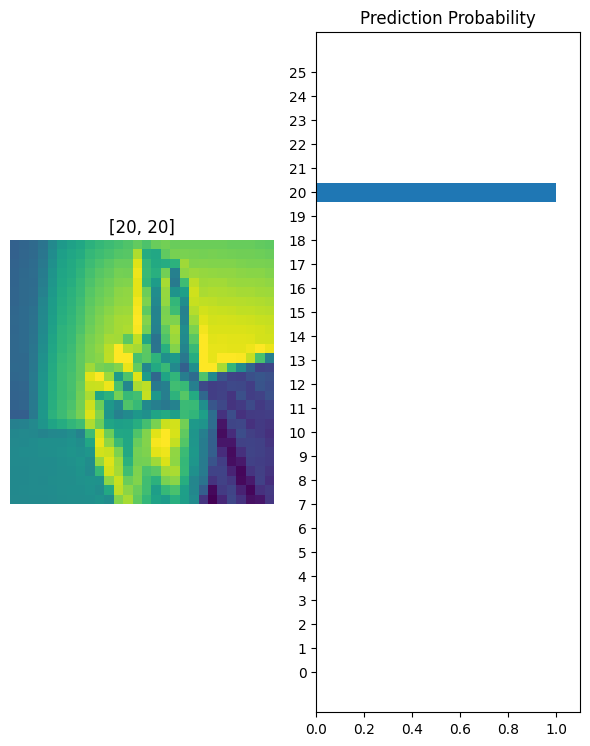

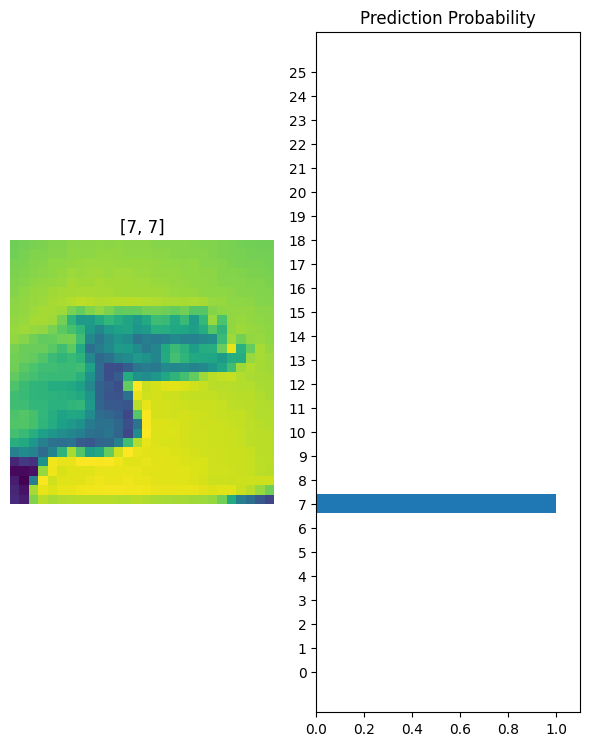

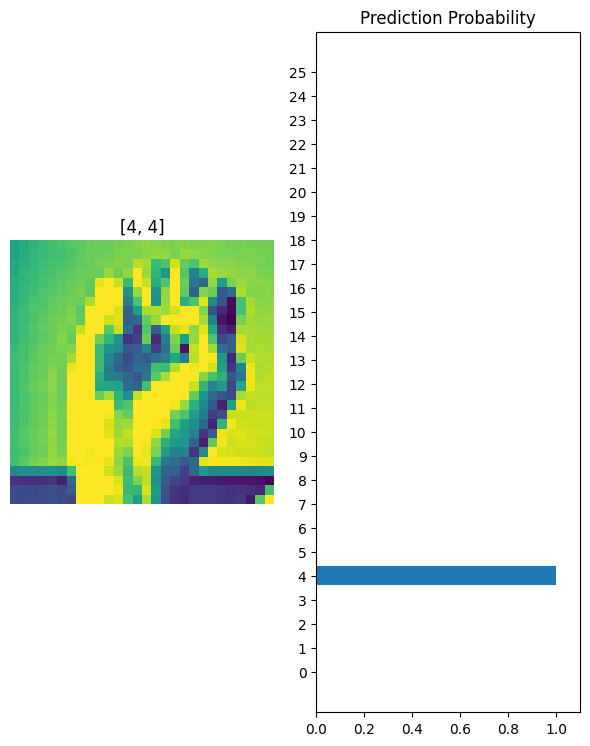

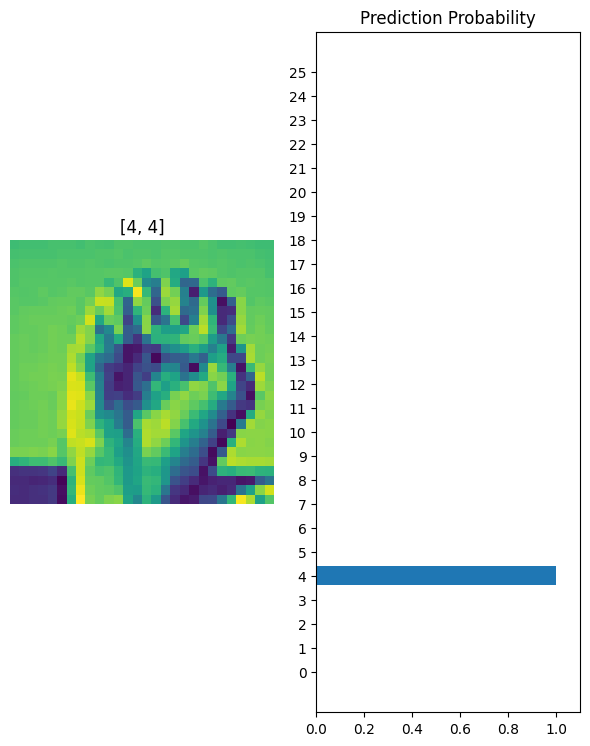

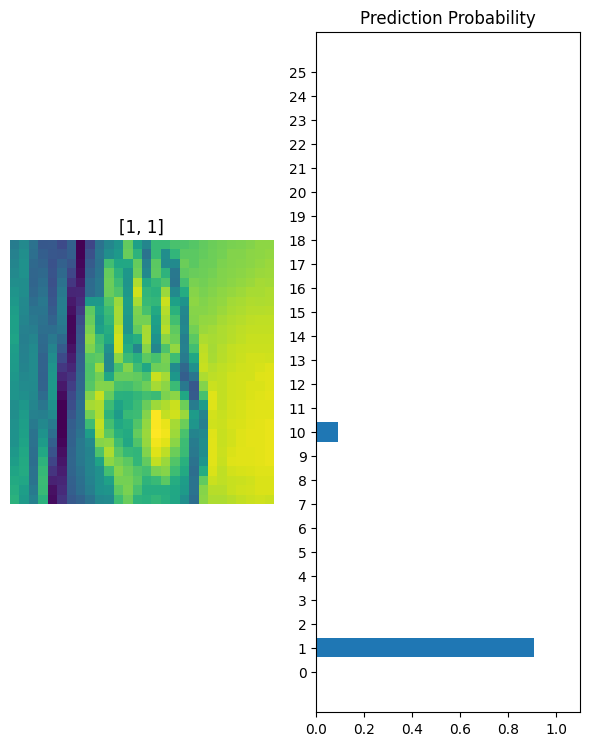

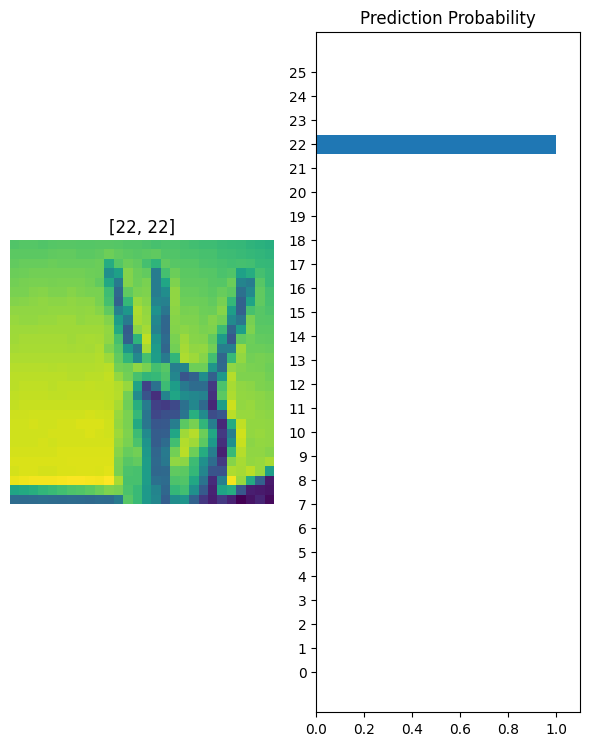

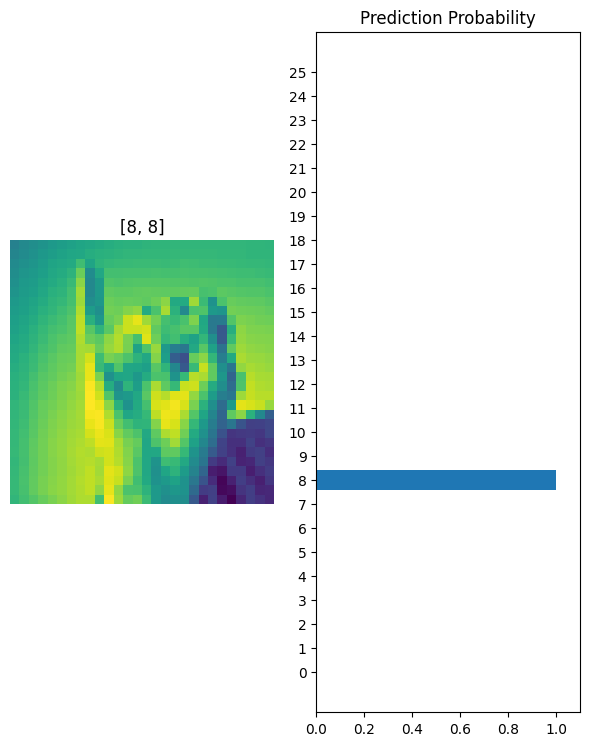

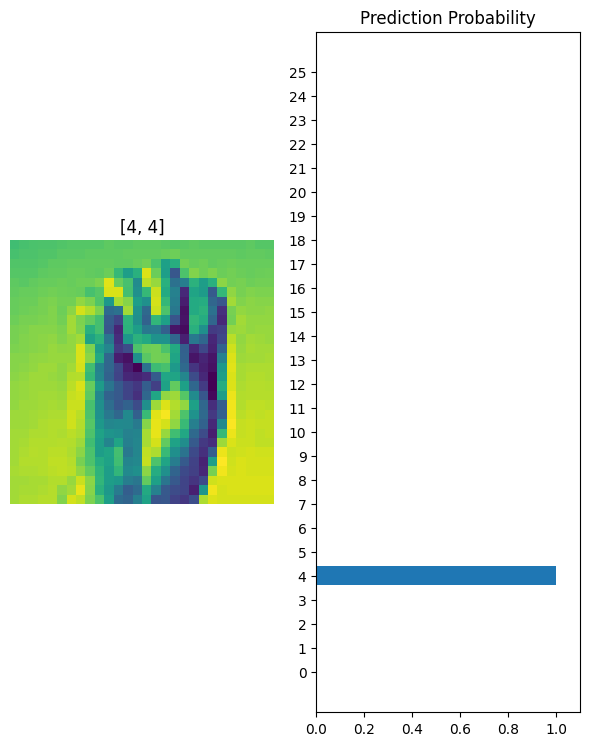

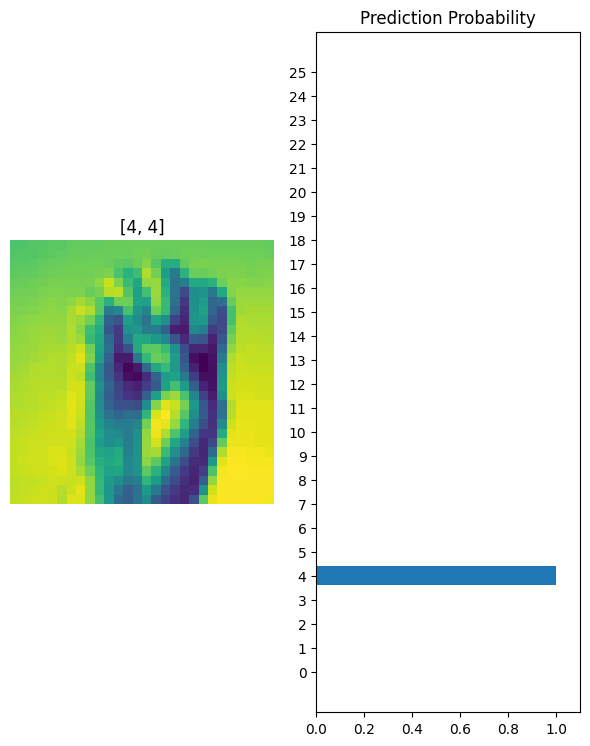

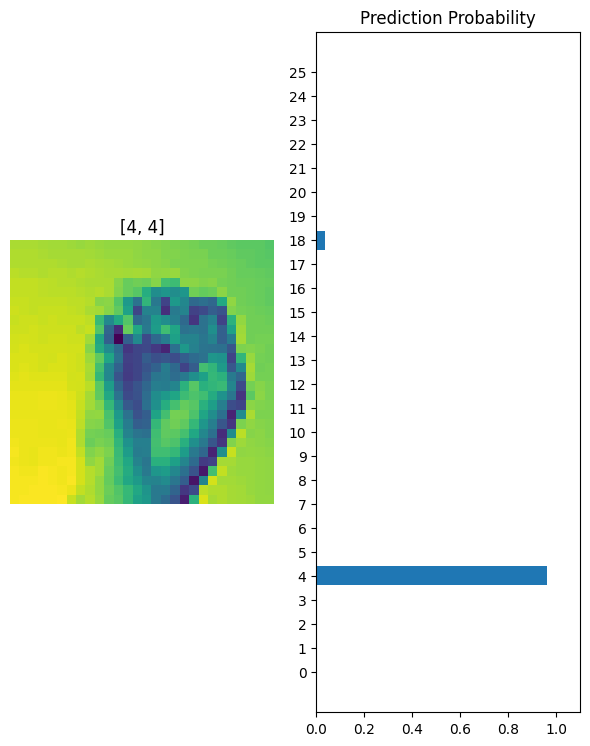

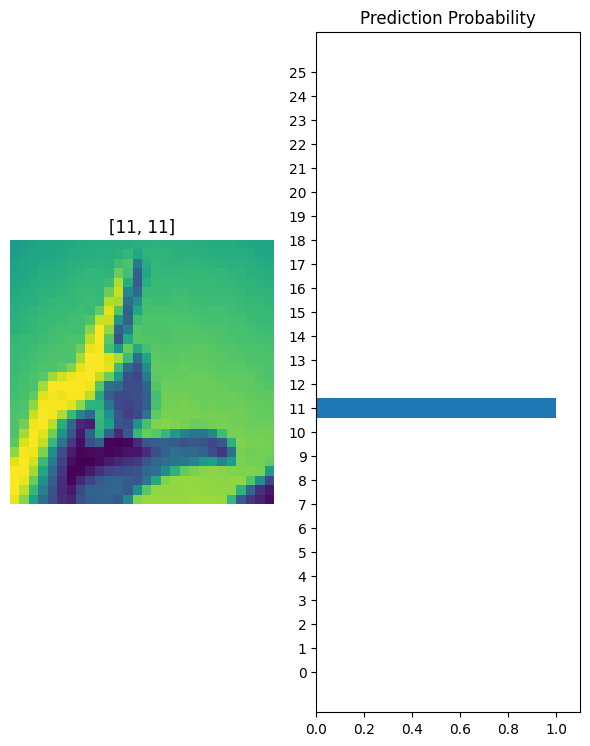

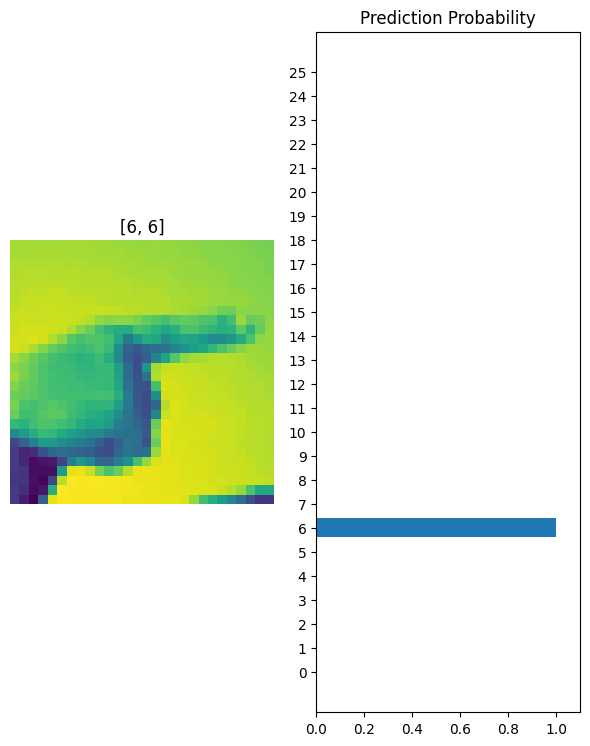

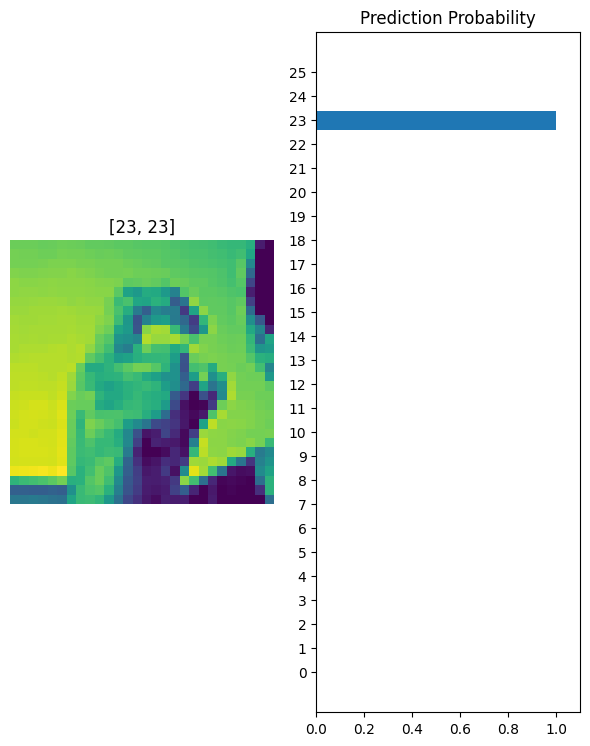

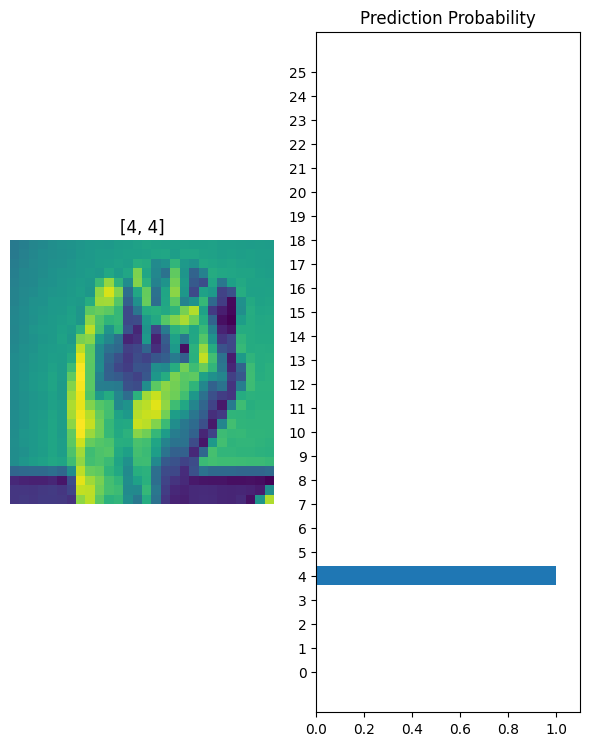

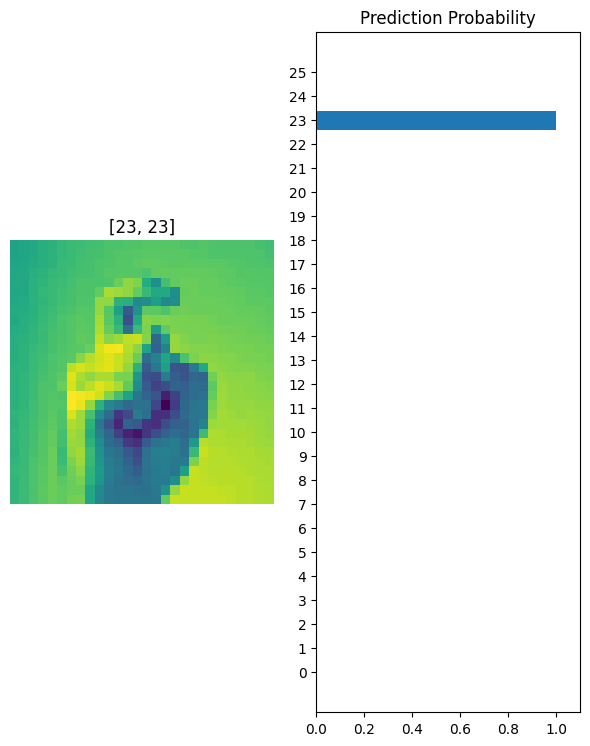

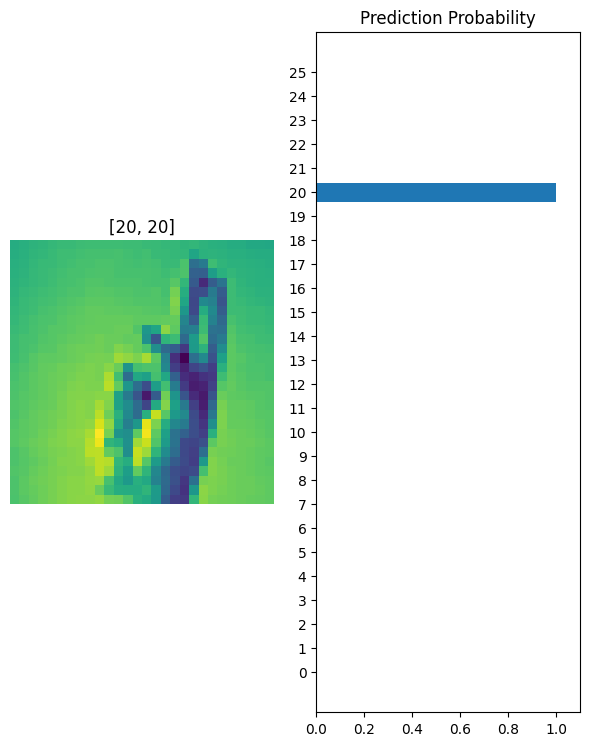

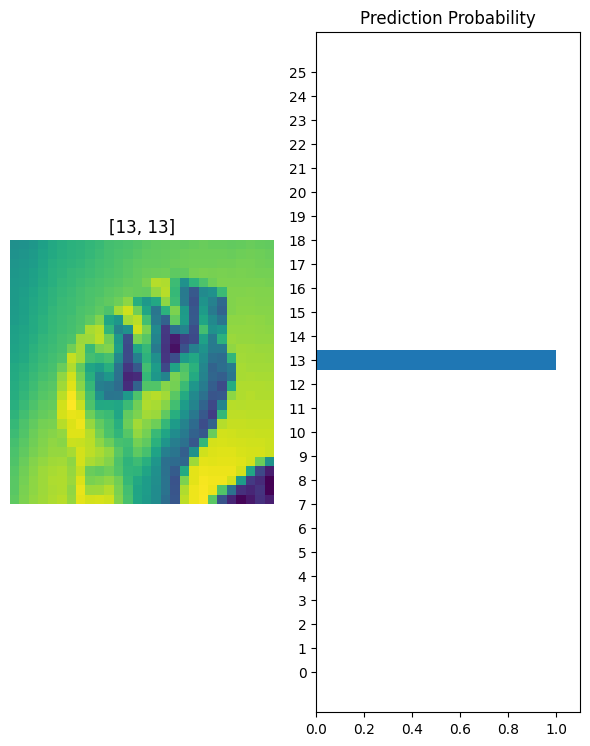

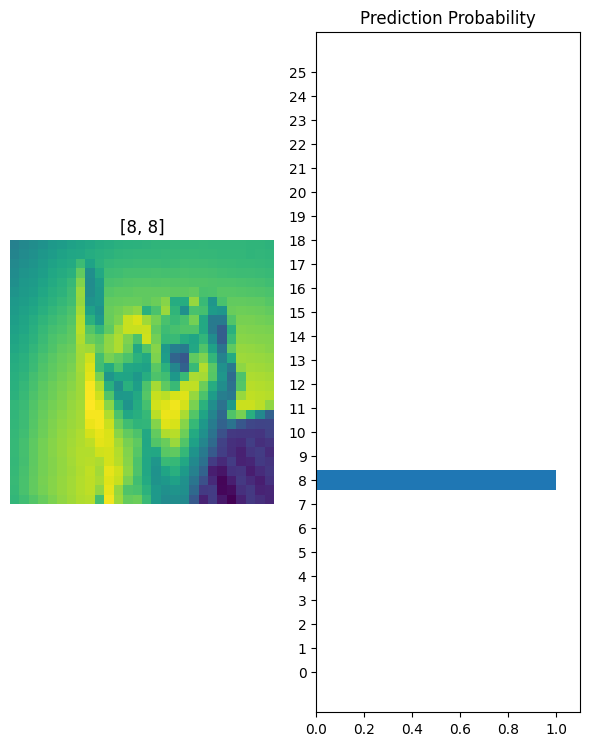

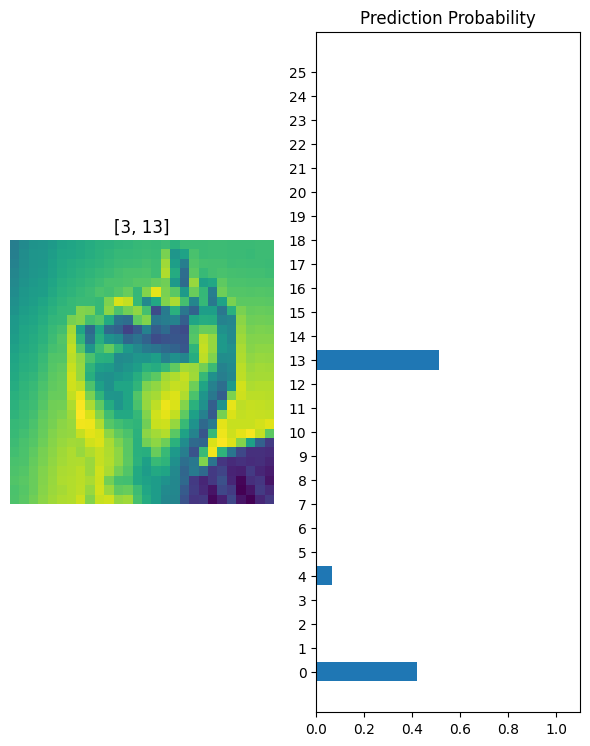

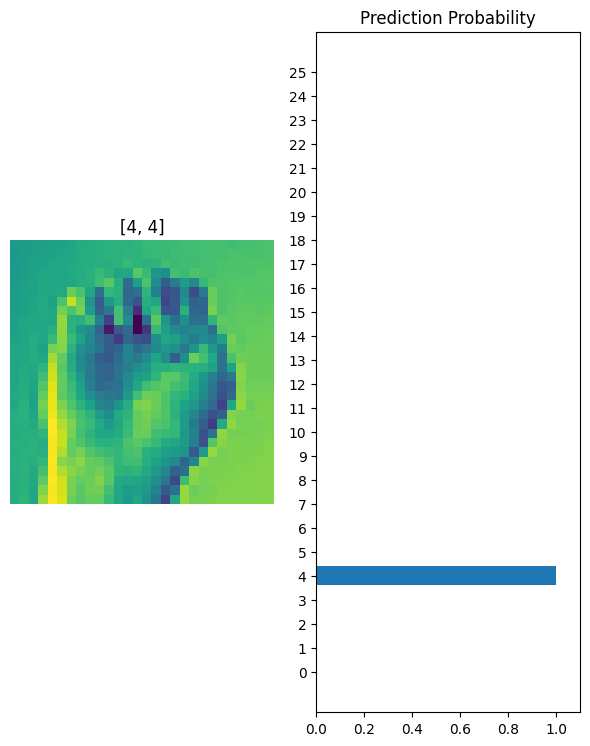

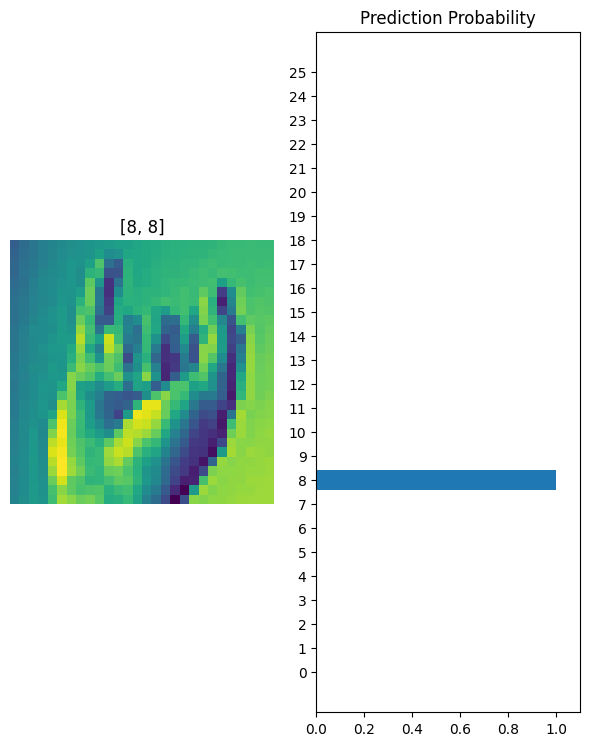

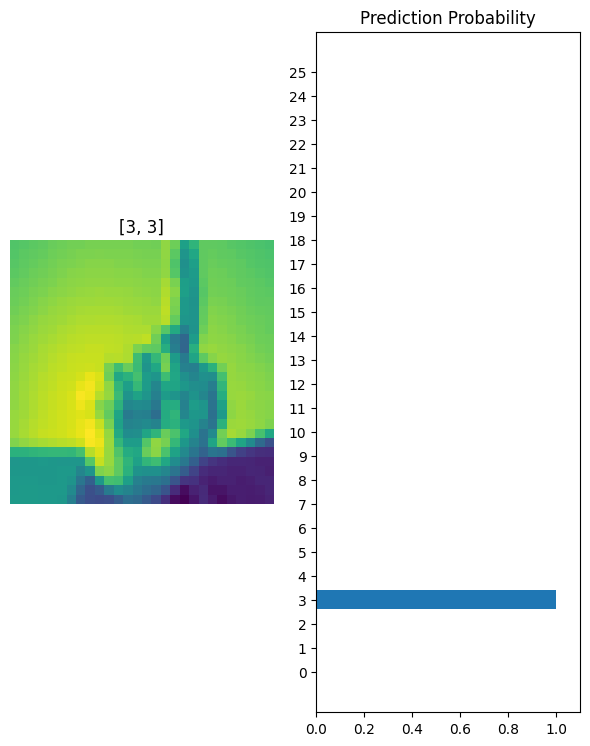

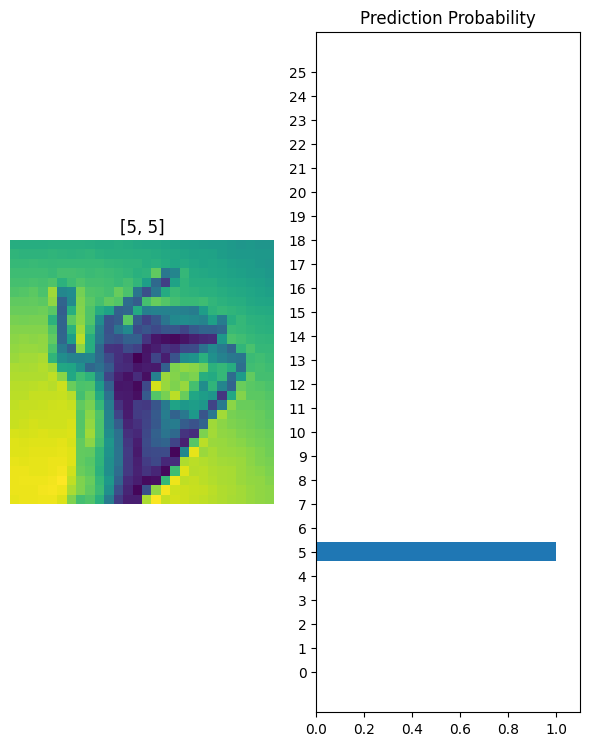

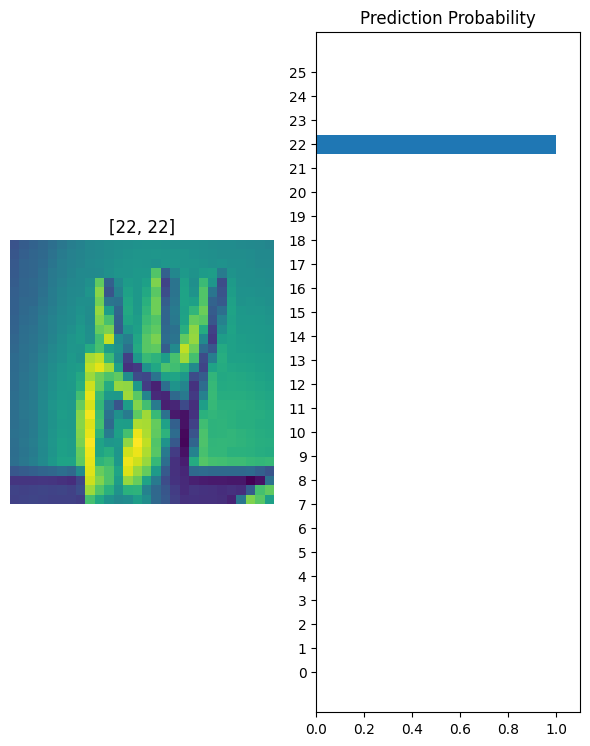

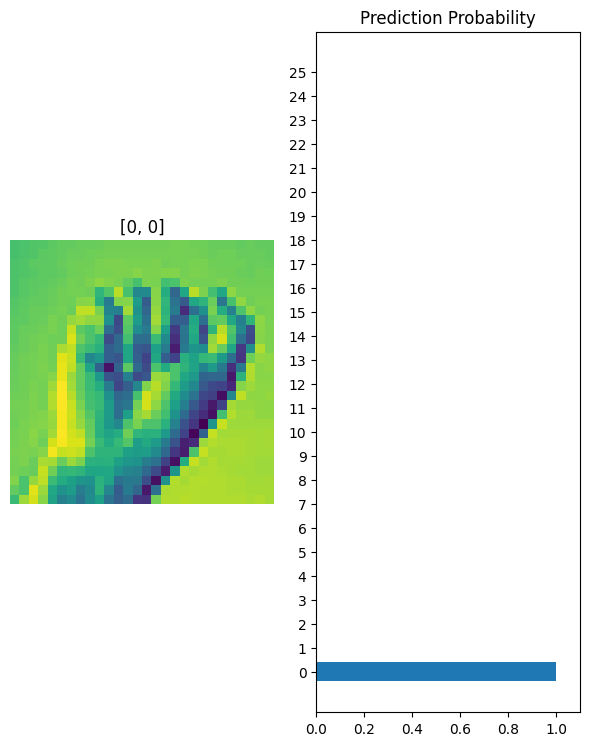

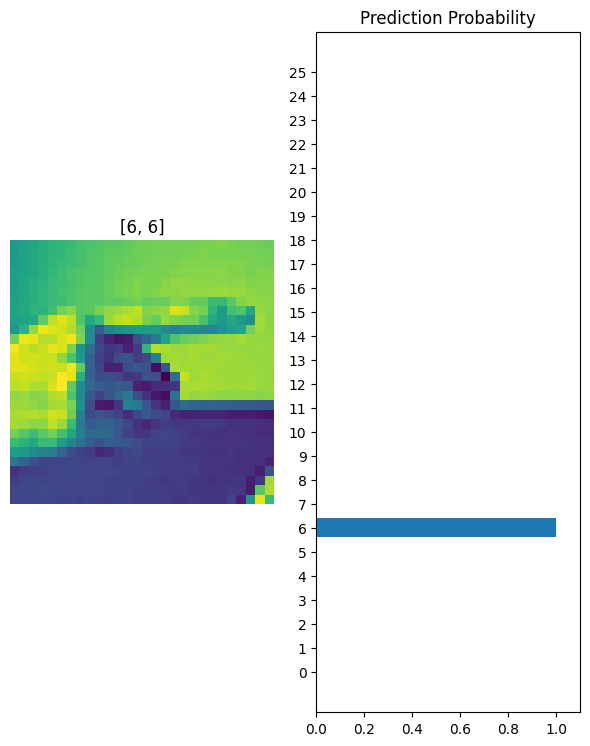

In [ ]:
model_cnn.to('cpu')

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_cnn(image_batch)
for i in range(26):
    img = image_batch[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

# Effect of image scrambling

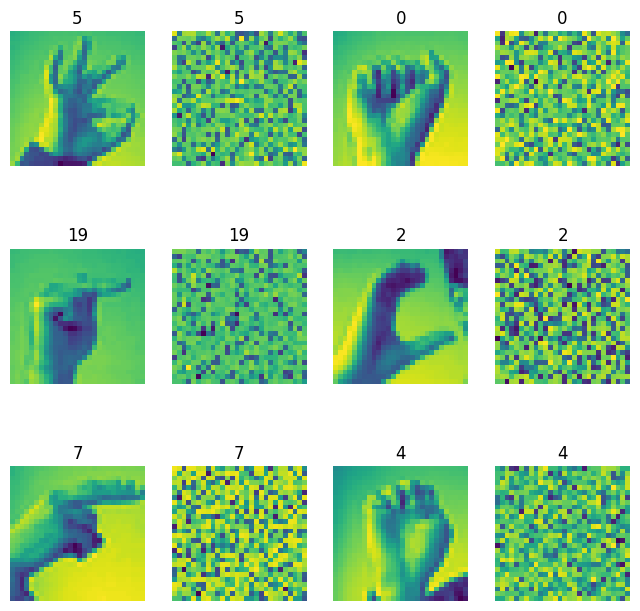

In [ ]:
fixed_perm = torch.randperm(784) # Fix a permutation of the image pixels; We apply the same permutation to all images

# show some training images
plt.figure(figsize=(8, 8))

# fetch a batch of train images; RANDOM
image_batch, label_batch = next(iter(train_loader))

for i in range(6):
    image = image_batch[i]
    image_perm = image.view(-1, 28*28).clone()
    image_perm = image_perm[:, fixed_perm]
    image_perm = image_perm.view(-1, 1, 28, 28)

    label = label_batch[i].item()
    plt.subplot(3,4 , 2*i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off')
    plt.title(label)
    plt.subplot(3, 4, 2*i+2)
    plt.imshow(image_perm.squeeze().numpy())
    plt.axis('off')
    plt.title(label)

In [ ]:
accuracy_list = []

def scramble_train(epoch, model, perm=torch.arange(0, 784).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)

        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def scramble_test(model, perm=torch.arange(0, 784).long()):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)

        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)

        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

## DNN

In [ ]:
print("Training on ", device)
model_fnn_2 = FC2Layer(input_size, output_size)
model_fnn_2.to(device)
optimizer = optim.SGD(model_fnn_2.parameters(), lr=0.1)
print('Number of parameters: {}'.format(get_n_params(model_fnn_2)))

start_fnn1 = time.perf_counter()
for epoch in range(0, 10):
    scramble_train(epoch, model_fnn_2, fixed_perm)
    scramble_test(model_fnn_2, fixed_perm)
stop_fnn1 = time.perf_counter()
print("DNN with scrambling runtime: {0:.2f} seconds".format(stop_fnn1 - start_fnn1))

Training on  cuda:0
Number of parameters: 44136
Train Epoch: 0 [0/27455 (0%)]	Loss: 3.286645
Train Epoch: 0 [6400/27455 (23%)]	Loss: 2.977461
Train Epoch: 0 [12800/27455 (47%)]	Loss: 2.766923
Train Epoch: 0 [19200/27455 (70%)]	Loss: 2.452292
Train Epoch: 0 [25600/27455 (93%)]	Loss: 2.353122

Test set: Average loss: 3.0060, Accuracy: 957/7172 (13%)

Train Epoch: 1 [0/27455 (0%)]	Loss: 2.931165
Train Epoch: 1 [6400/27455 (23%)]	Loss: 2.548739
Train Epoch: 1 [12800/27455 (47%)]	Loss: 2.075928
Train Epoch: 1 [19200/27455 (70%)]	Loss: 2.090076
Train Epoch: 1 [25600/27455 (93%)]	Loss: 2.243323

Test set: Average loss: 2.1704, Accuracy: 1612/7172 (22%)

Train Epoch: 2 [0/27455 (0%)]	Loss: 1.968713
Train Epoch: 2 [6400/27455 (23%)]	Loss: 2.067951
Train Epoch: 2 [12800/27455 (47%)]	Loss: 1.587059
Train Epoch: 2 [19200/27455 (70%)]	Loss: 1.982335
Train Epoch: 2 [25600/27455 (93%)]	Loss: 1.674184

Test set: Average loss: 1.9371, Accuracy: 2718/7172 (38%)

Train Epoch: 3 [0/27455 (0%)]	Loss: 1.800

**Performance accuracy decreased from 59% to 47%**

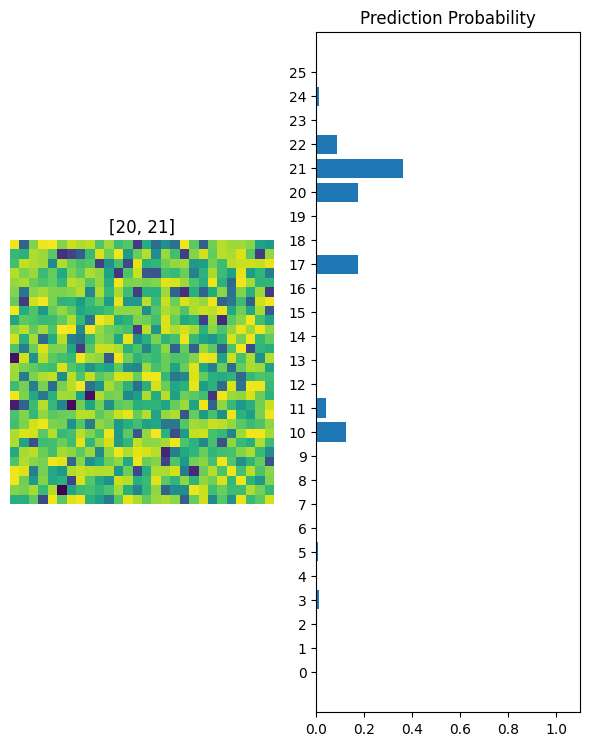

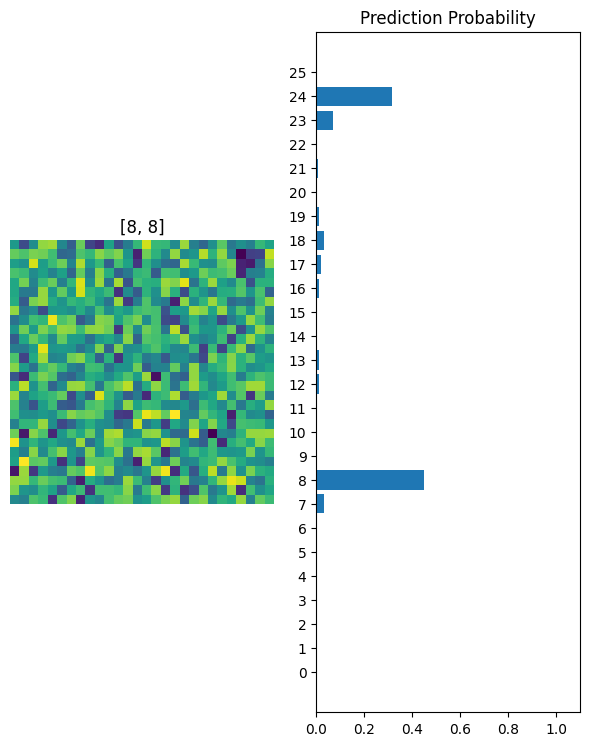

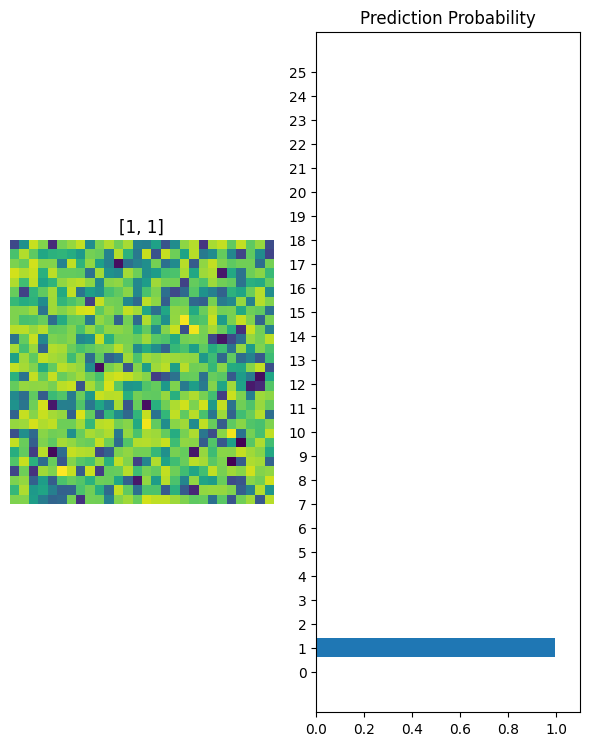

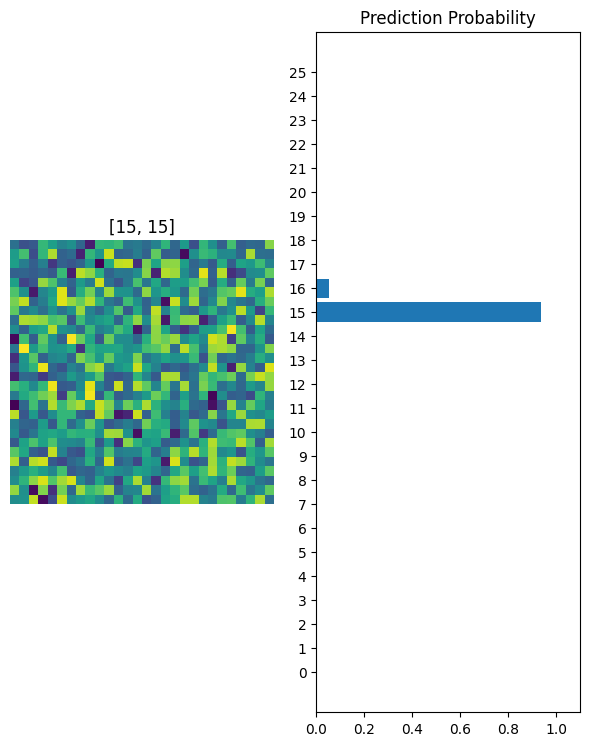

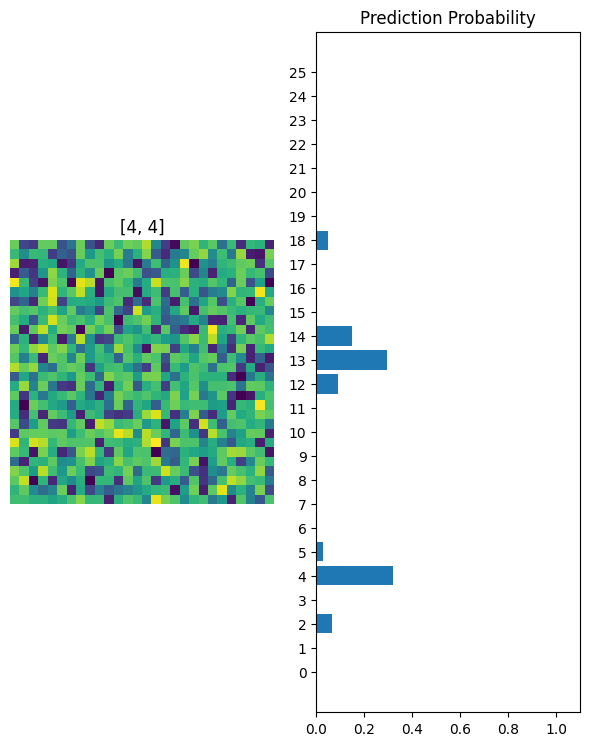

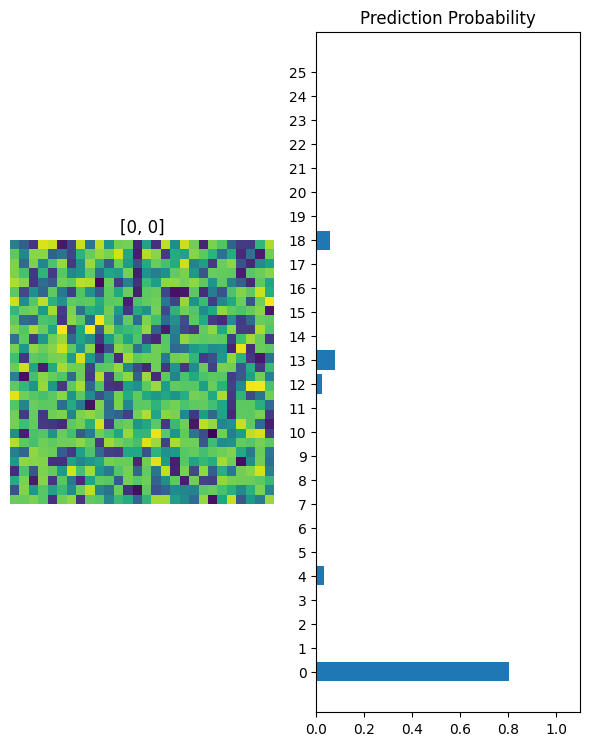

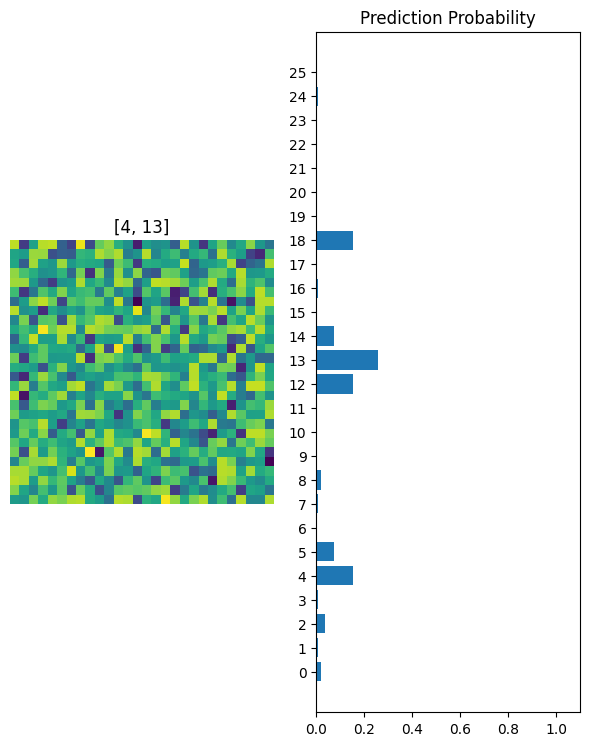

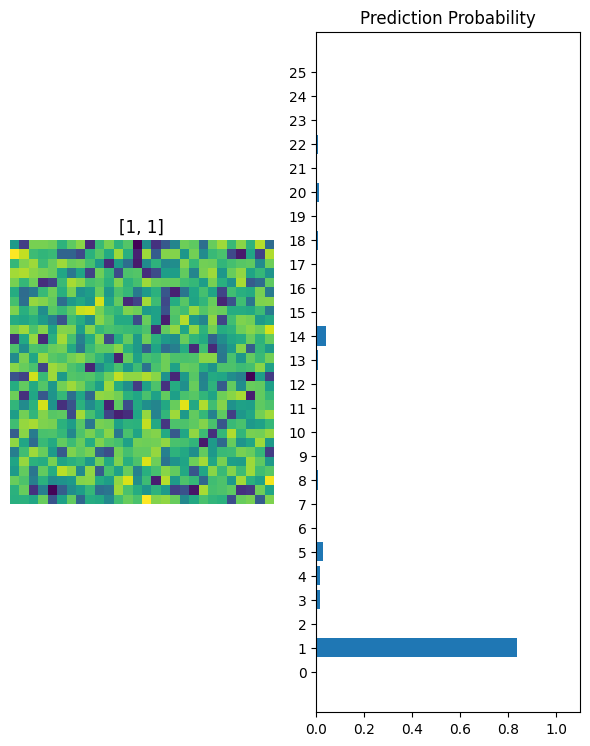

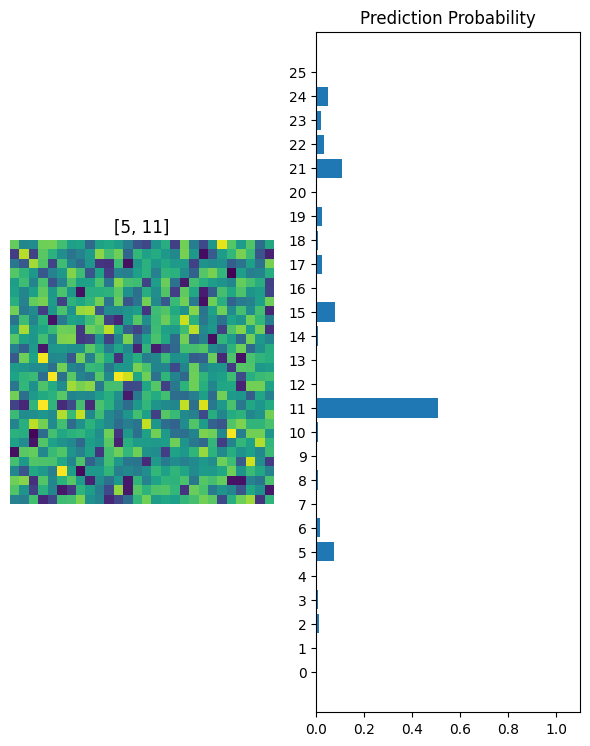

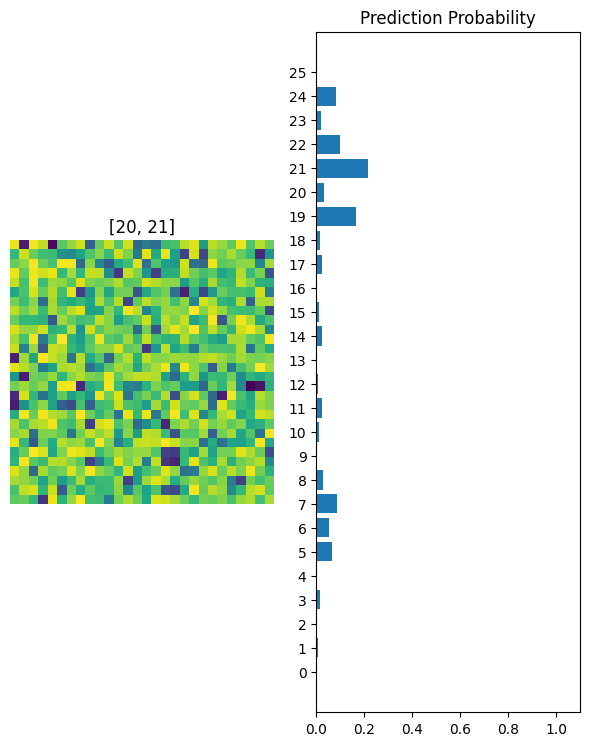

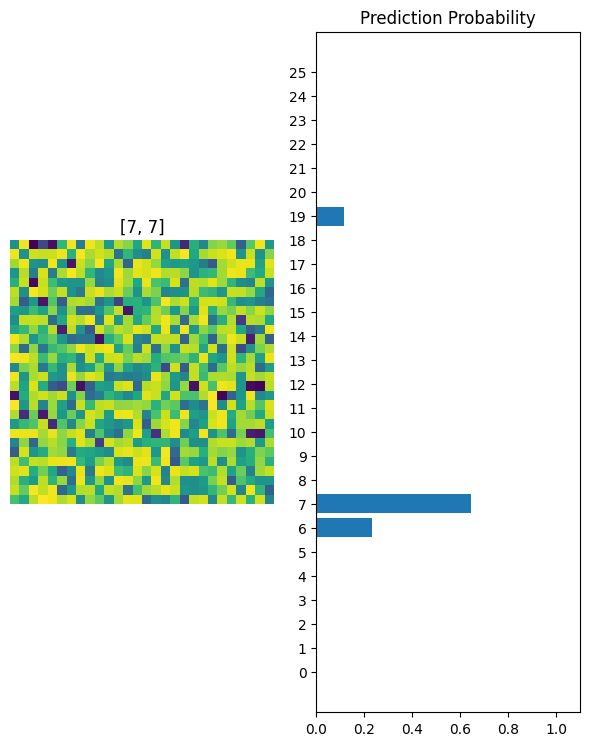

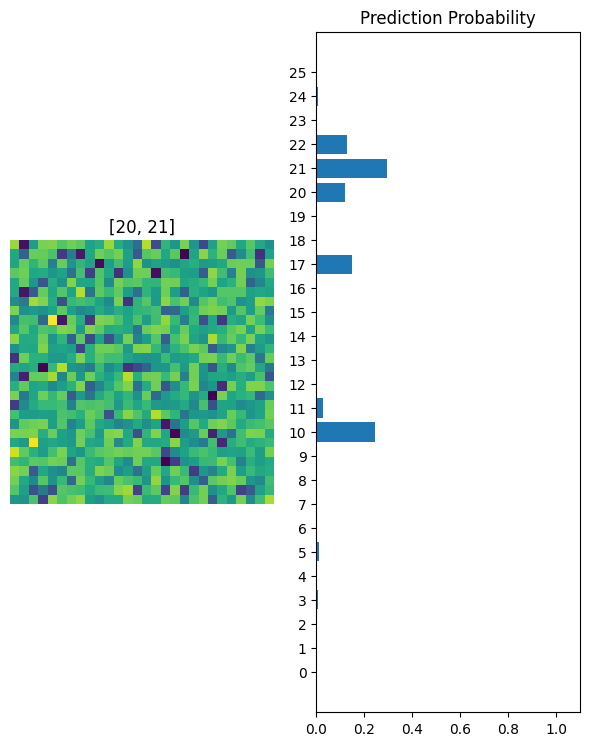

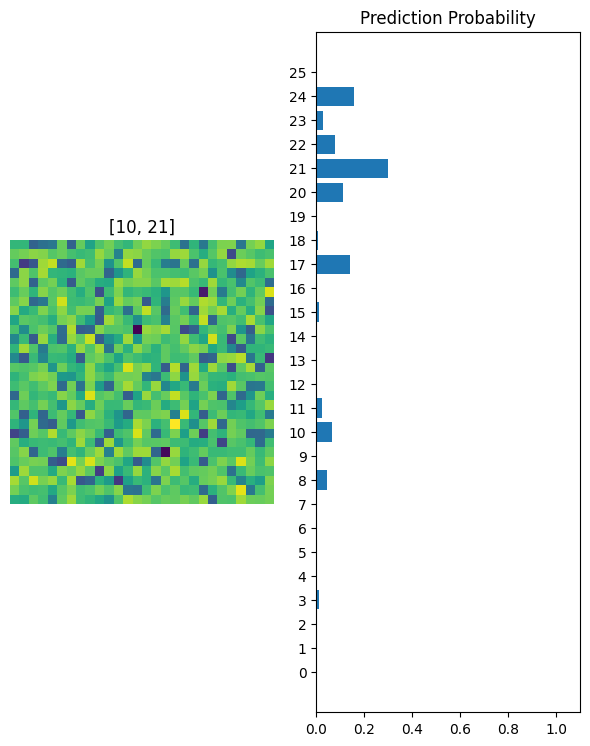

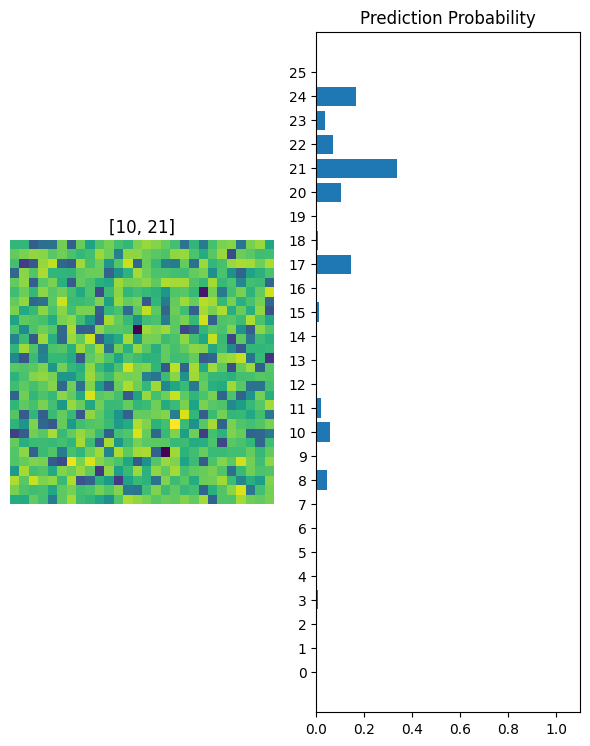

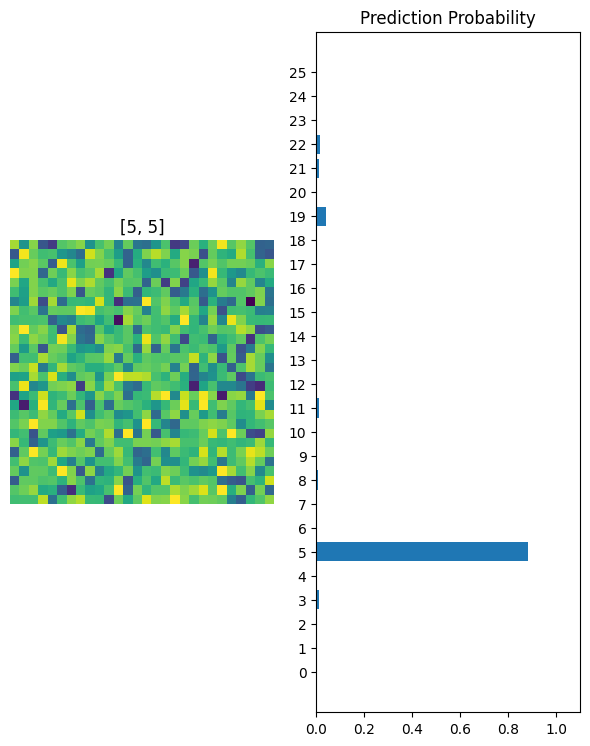

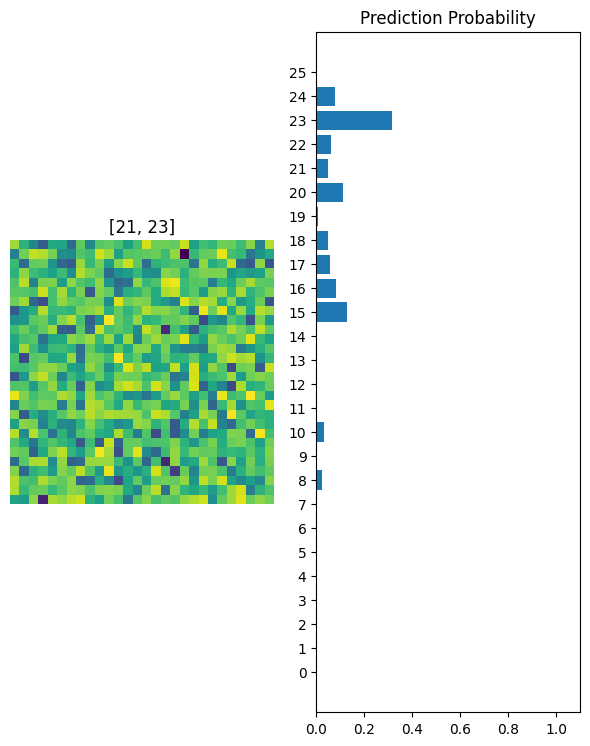

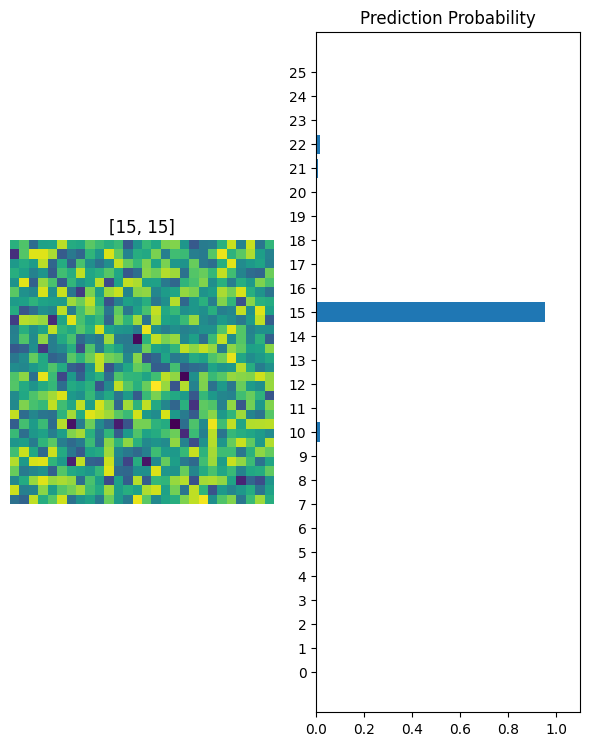

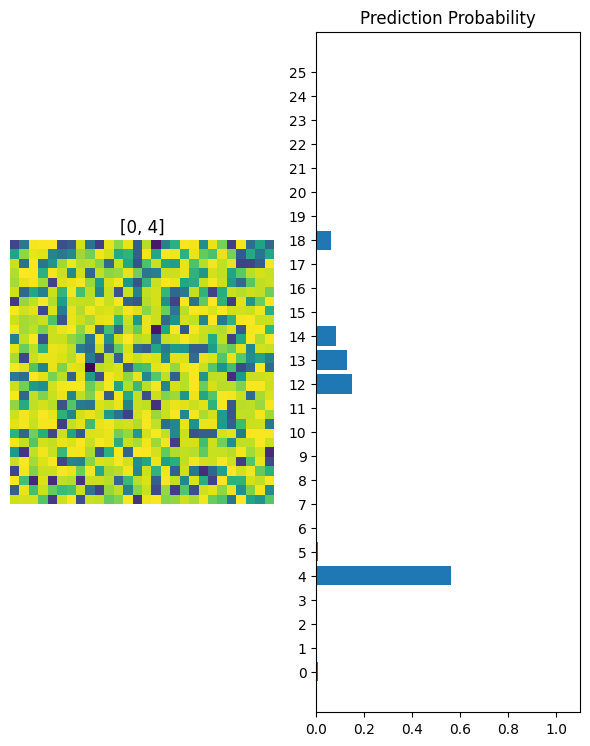

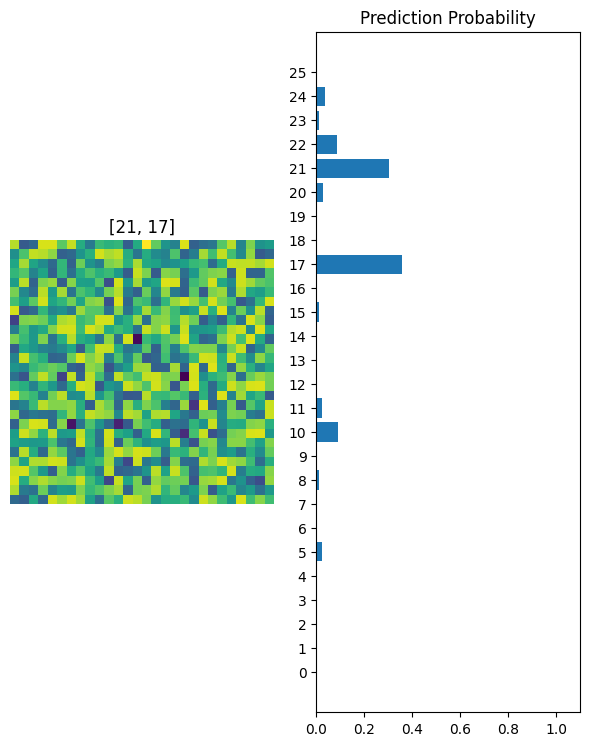

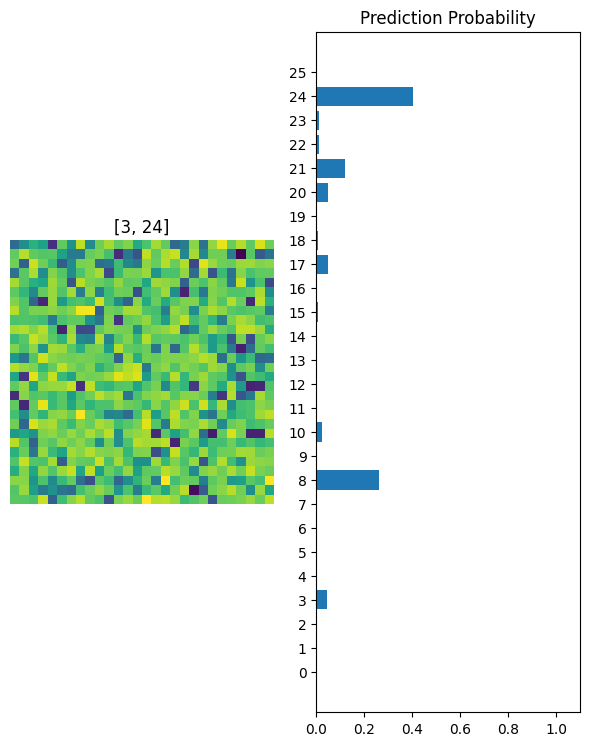

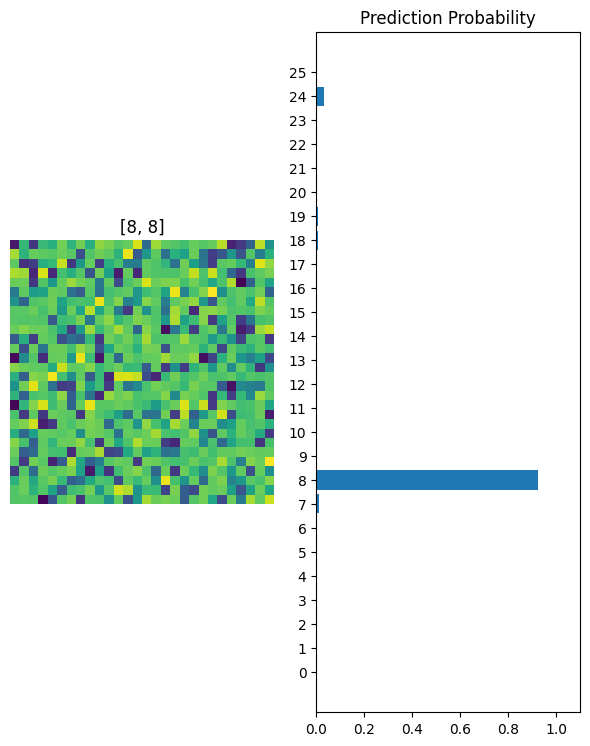

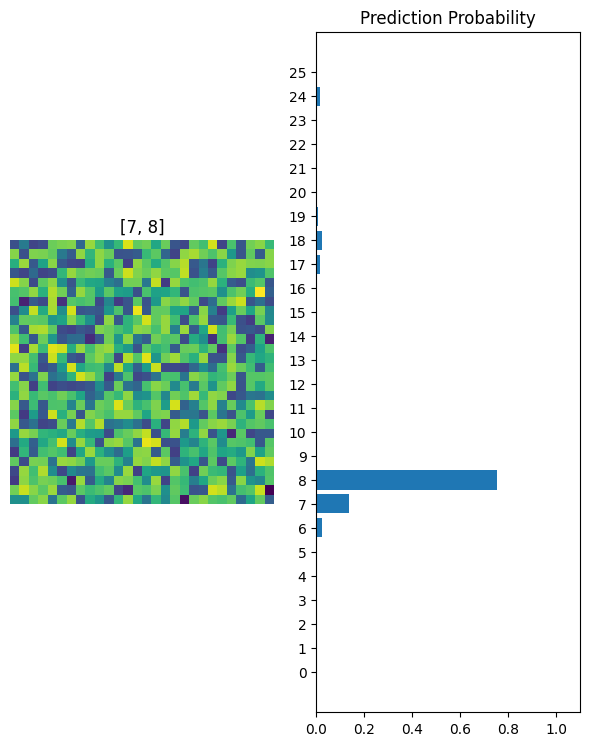

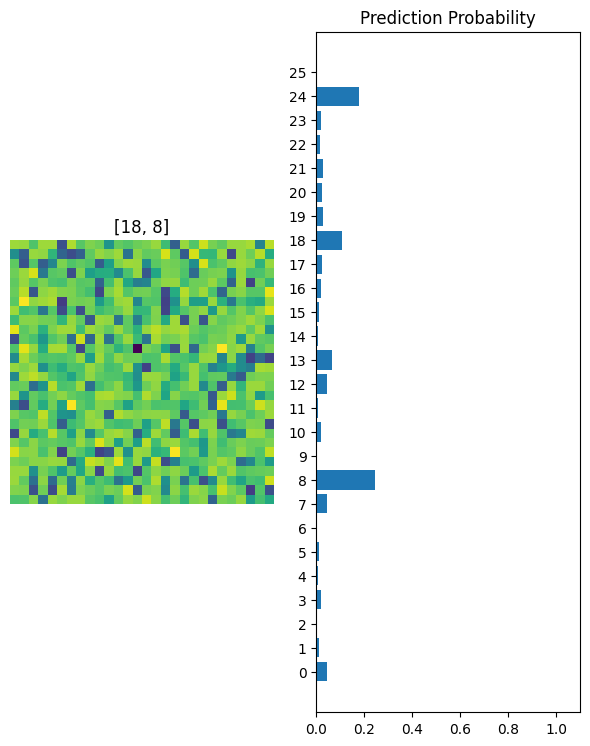

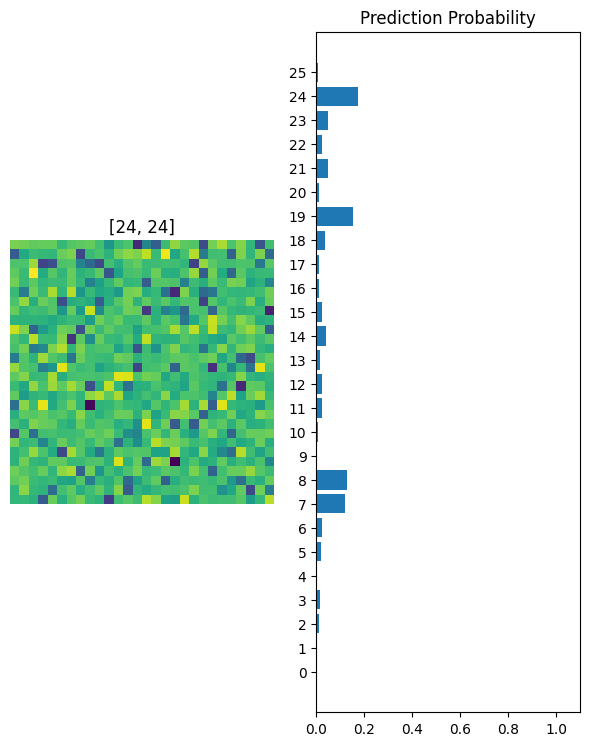

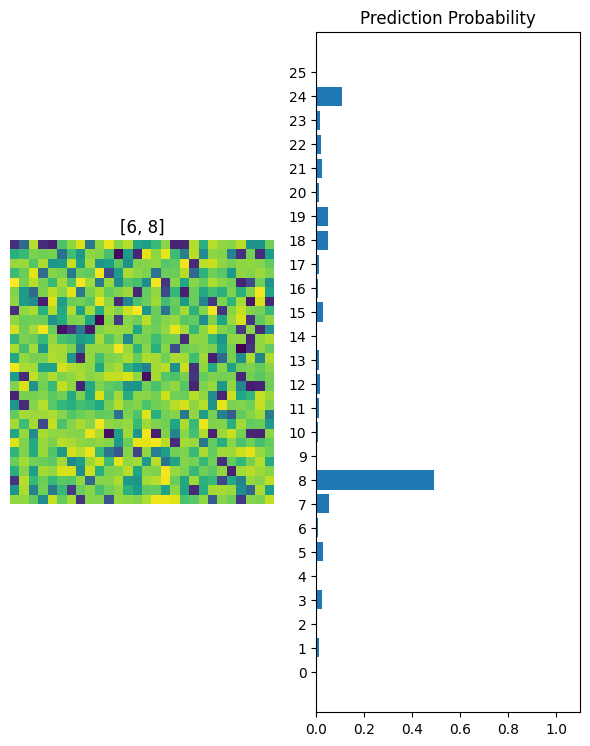

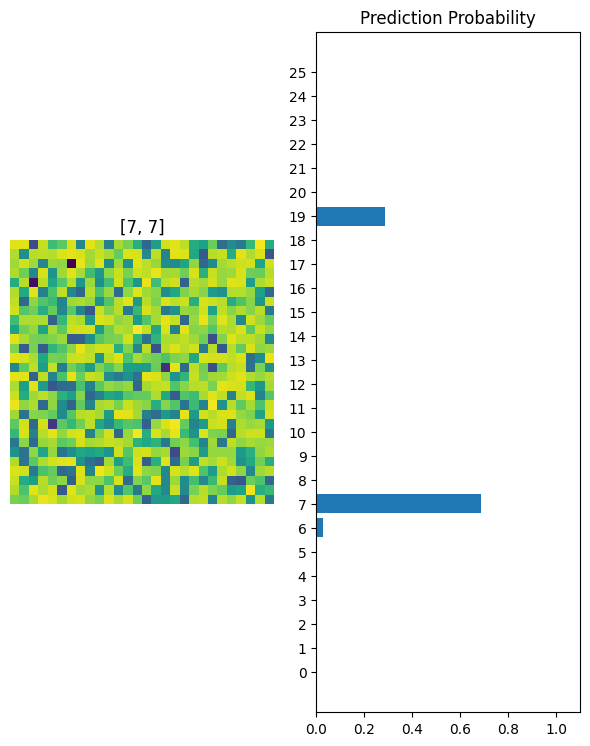

In [ ]:
model_fnn_2.to('cpu')

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))
image_batch_scramble = image_batch.view(-1, 28*28)
image_batch_scramble = image_batch_scramble[:, fixed_perm]
image_batch_scramble = image_batch_scramble.view(-1, 1, 28, 28)
# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_fnn_2(image_batch_scramble)
for i in range(26):
    img = image_batch[i]
    img_perm = image_batch_scramble[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img_perm, pred_prob, real_label)

## CNN

In [ ]:
print("Training on ", device)
model_cnn_3 = CNN(input_size, output_size)
model_cnn_3.to(device)
optimizer = optim.SGD(model_cnn_3.parameters(), lr=0.01, momentum=0.9)
print('Number of parameters: {}'.format(get_n_params(model_cnn_3)))

start_cnn1 = time.perf_counter()
for epoch in range(0, 10):
    scramble_train(epoch, model_cnn_3, fixed_perm)
    scramble_test(model_cnn_3, fixed_perm)
stop_cnn1 = time.perf_counter()
print("CNN with scrambling runtime: {0:.2f} seconds".format(stop_cnn1 - start_cnn1))

Training on  cuda:0
Number of parameters: 117506
Train Epoch: 0 [0/27455 (0%)]	Loss: 3.259230
Train Epoch: 0 [6400/27455 (23%)]	Loss: 3.179338
Train Epoch: 0 [12800/27455 (47%)]	Loss: 3.222853
Train Epoch: 0 [19200/27455 (70%)]	Loss: 3.129102
Train Epoch: 0 [25600/27455 (93%)]	Loss: 3.029257

Test set: Average loss: 3.1045, Accuracy: 398/7172 (6%)

Train Epoch: 1 [0/27455 (0%)]	Loss: 3.037977
Train Epoch: 1 [6400/27455 (23%)]	Loss: 2.842287
Train Epoch: 1 [12800/27455 (47%)]	Loss: 2.271205
Train Epoch: 1 [19200/27455 (70%)]	Loss: 1.638939
Train Epoch: 1 [25600/27455 (93%)]	Loss: 1.350811

Test set: Average loss: 1.5932, Accuracy: 3613/7172 (50%)

Train Epoch: 2 [0/27455 (0%)]	Loss: 1.061411
Train Epoch: 2 [6400/27455 (23%)]	Loss: 0.815835
Train Epoch: 2 [12800/27455 (47%)]	Loss: 0.340659
Train Epoch: 2 [19200/27455 (70%)]	Loss: 0.188772
Train Epoch: 2 [25600/27455 (93%)]	Loss: 0.039083

Test set: Average loss: 1.8143, Accuracy: 4508/7172 (63%)

Train Epoch: 3 [0/27455 (0%)]	Loss: 0.012

**Performance decreased from 88% to 64%**

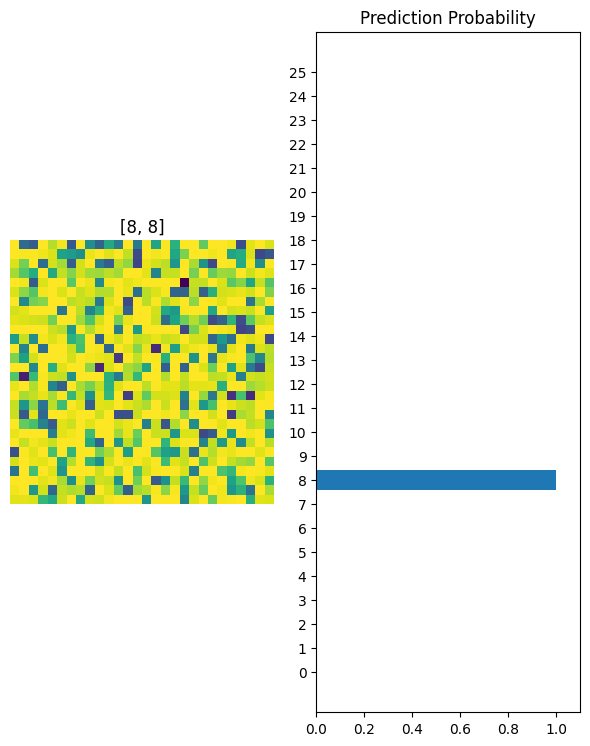

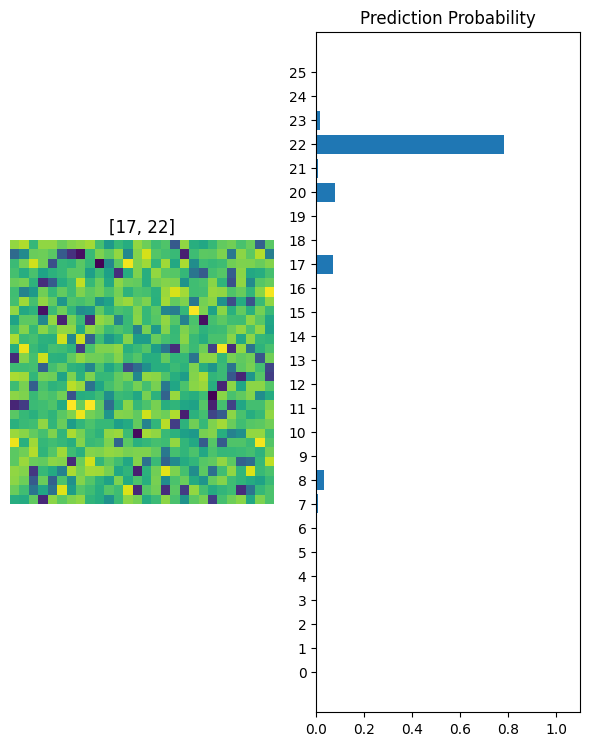

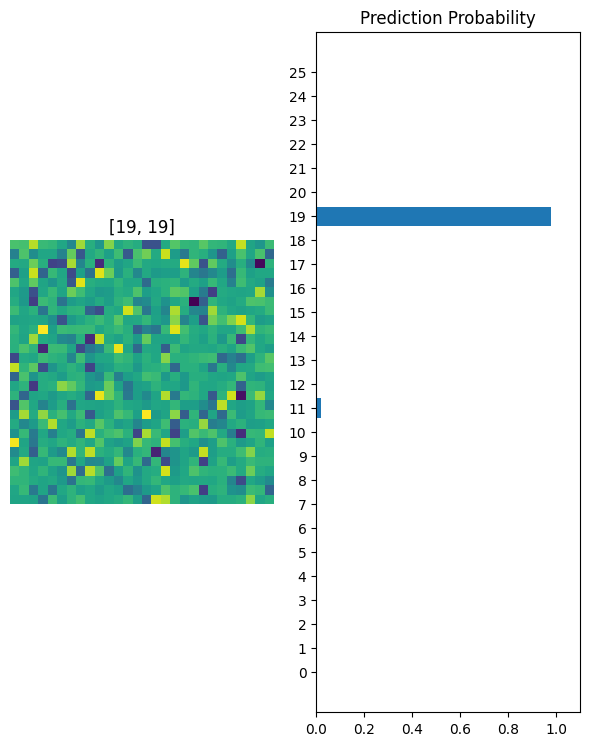

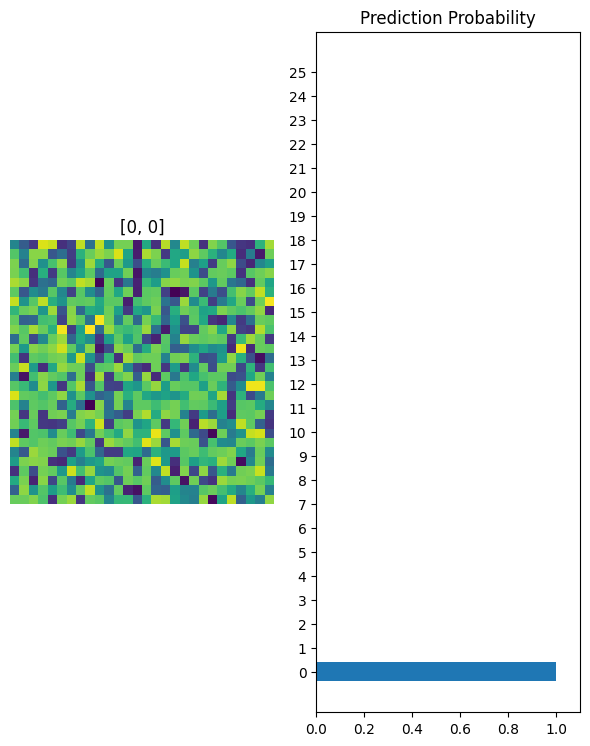

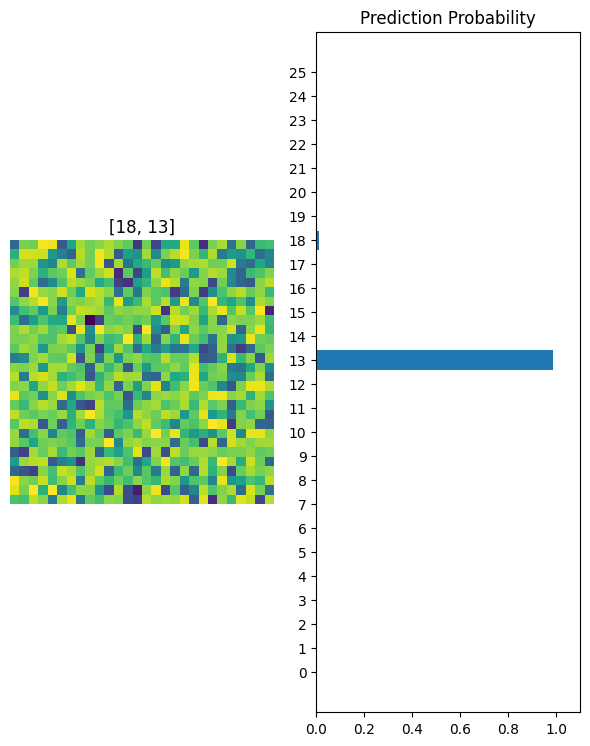

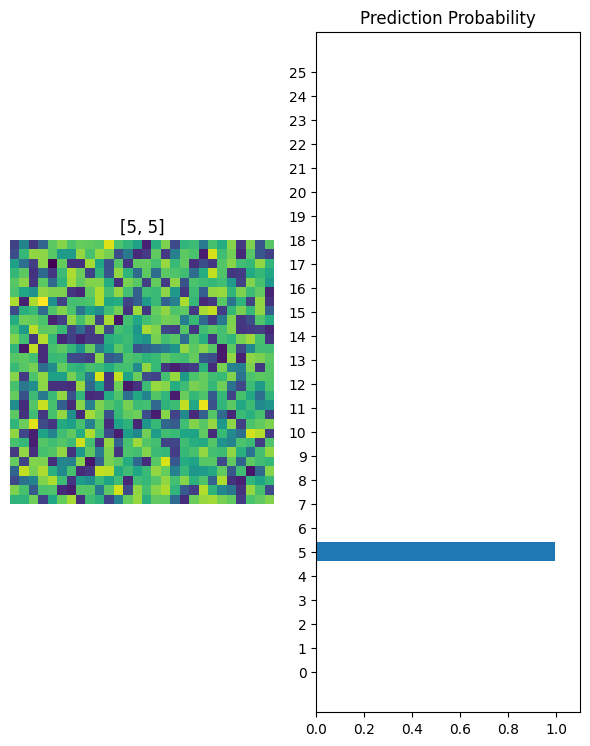

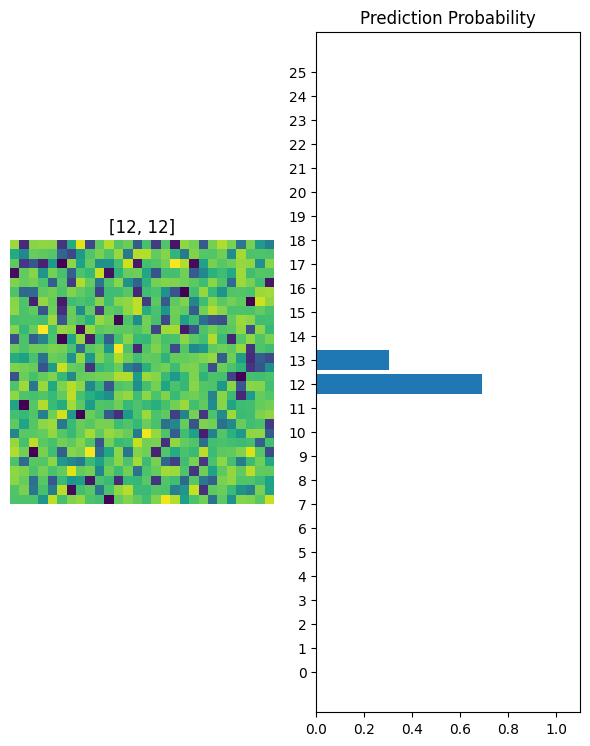

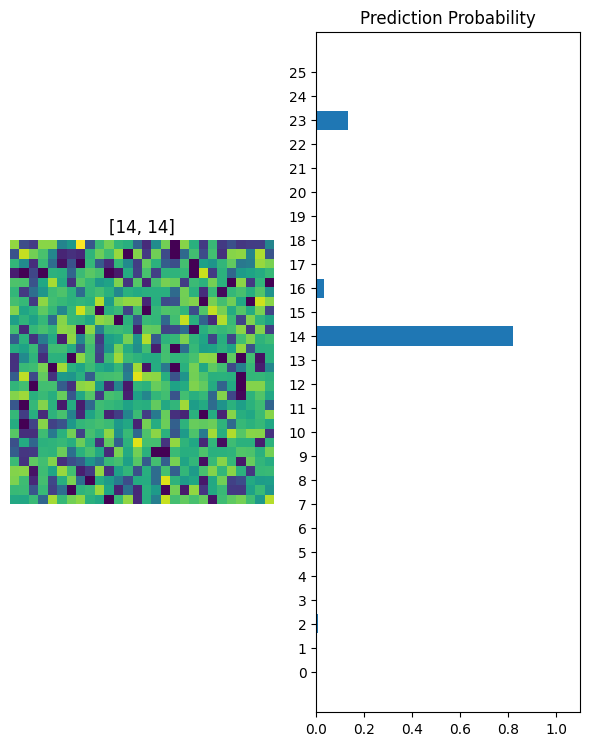

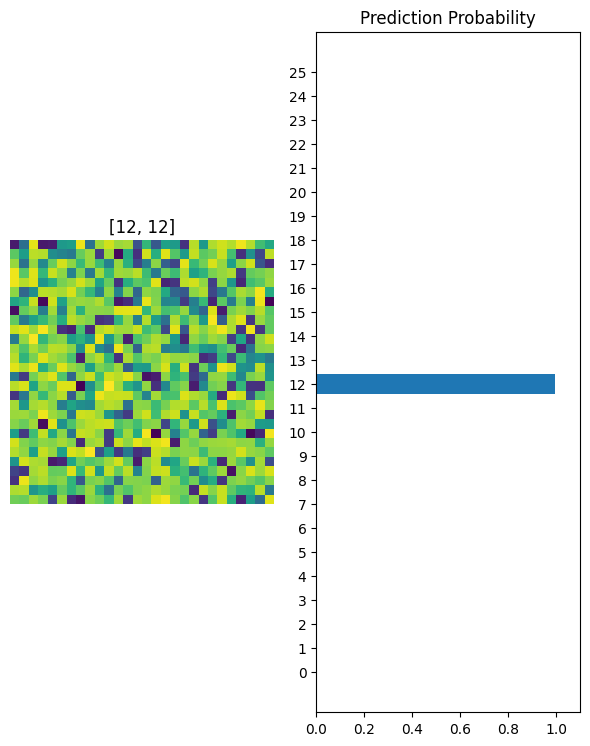

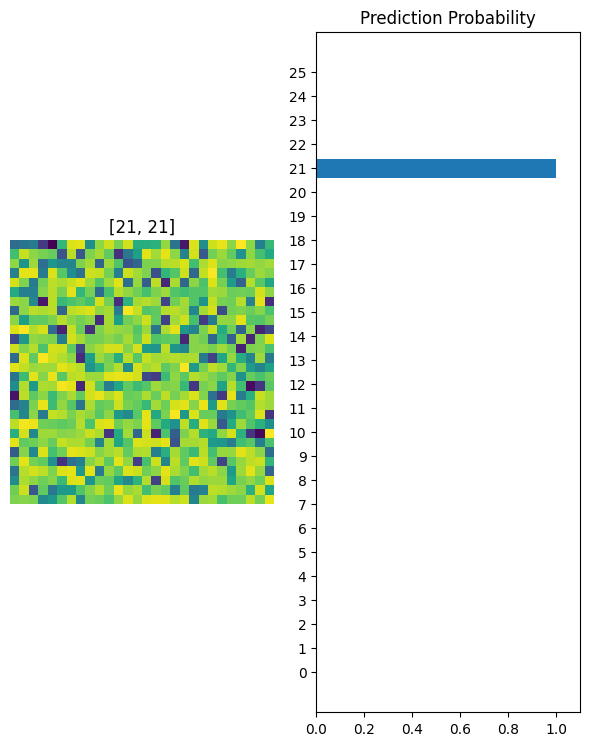

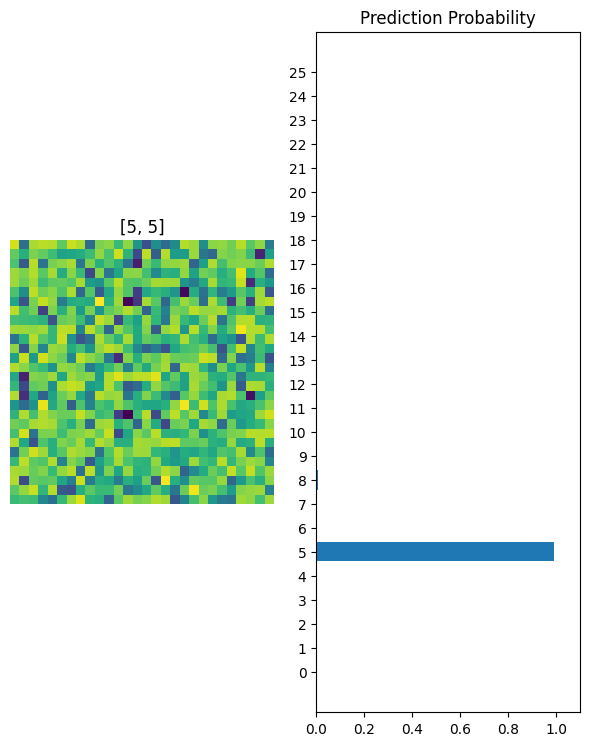

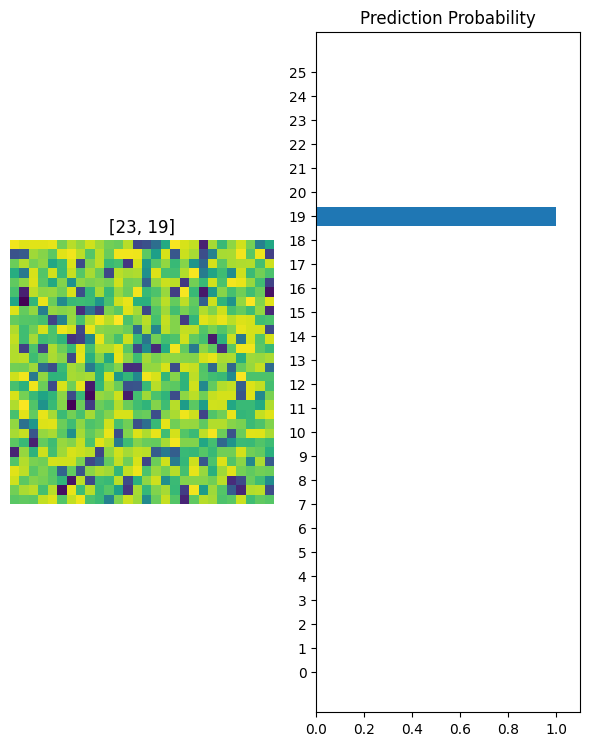

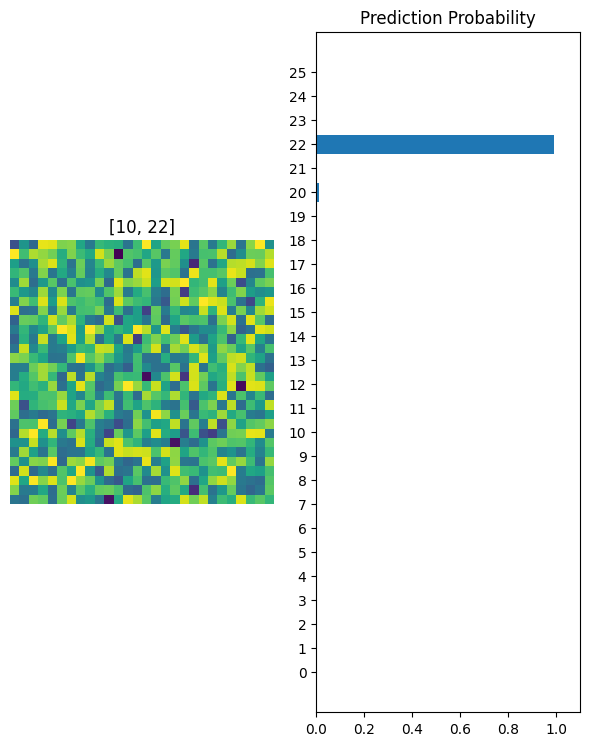

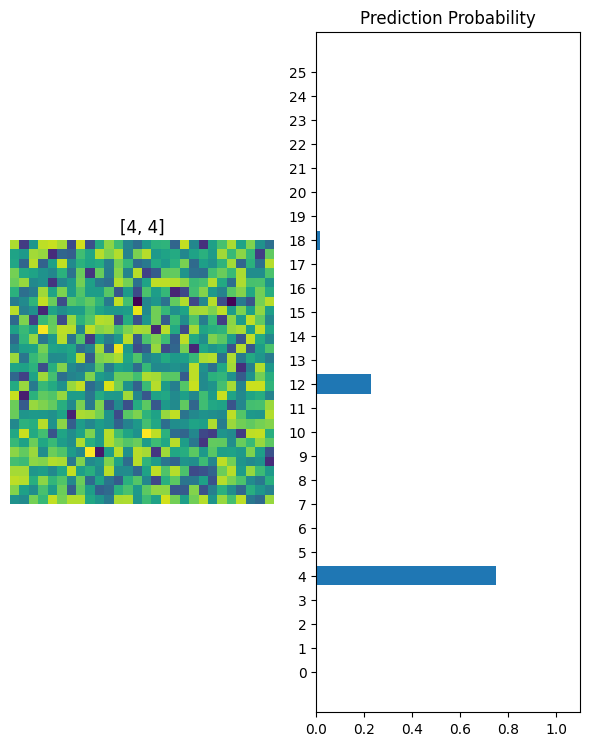

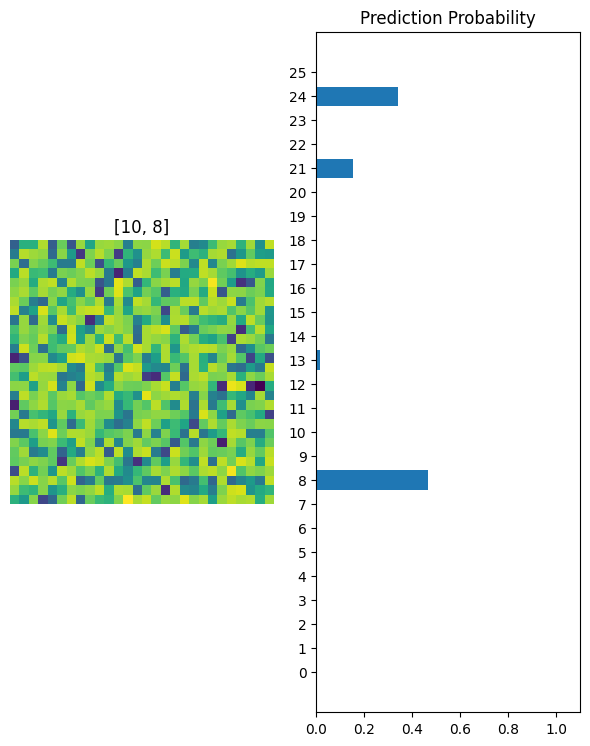

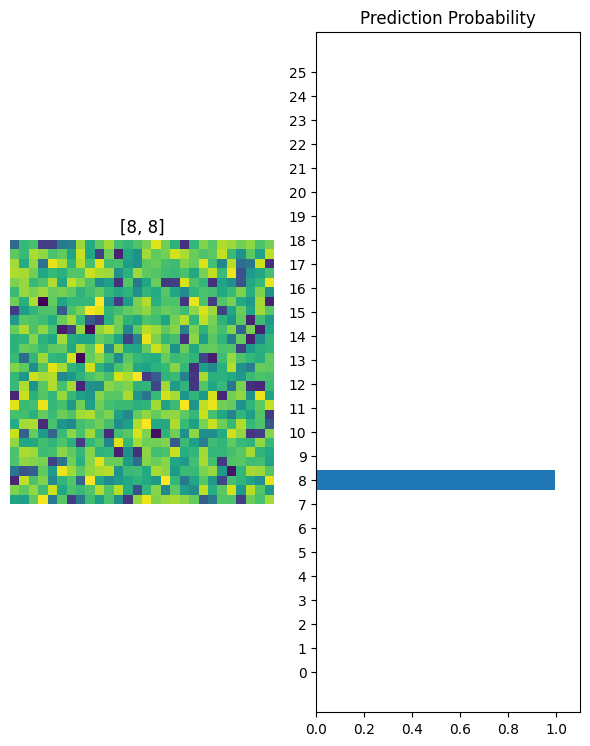

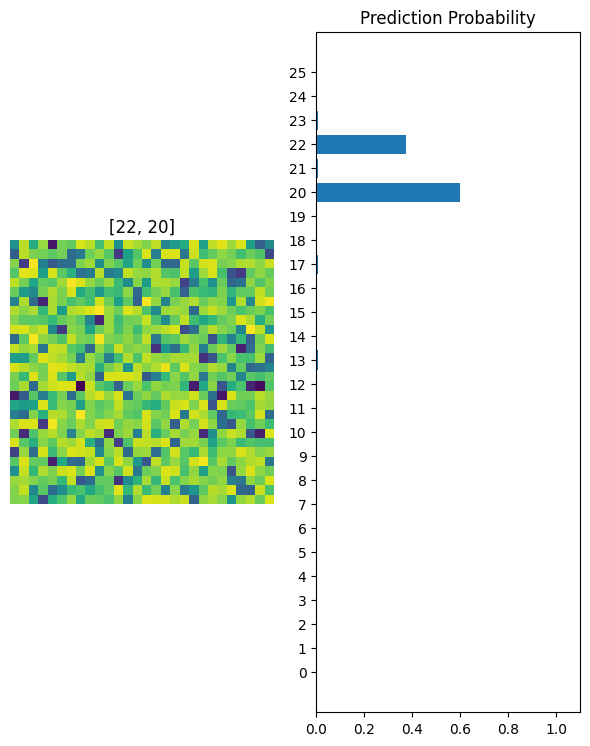

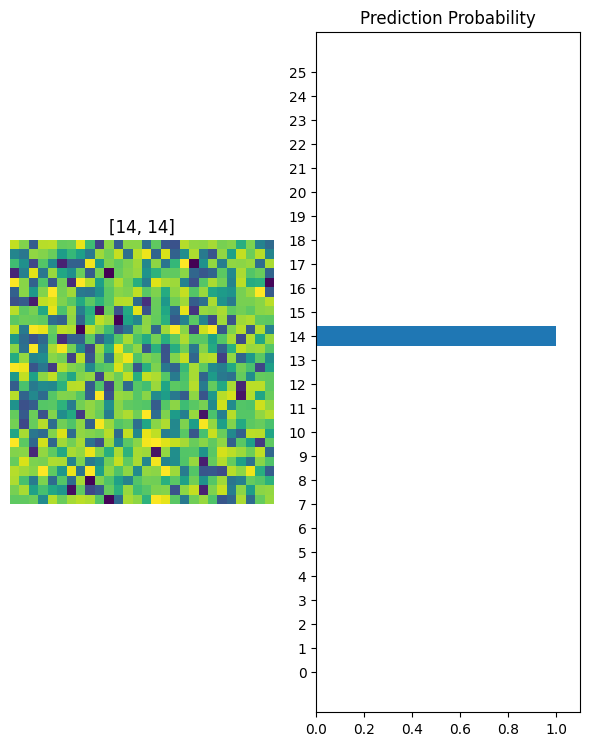

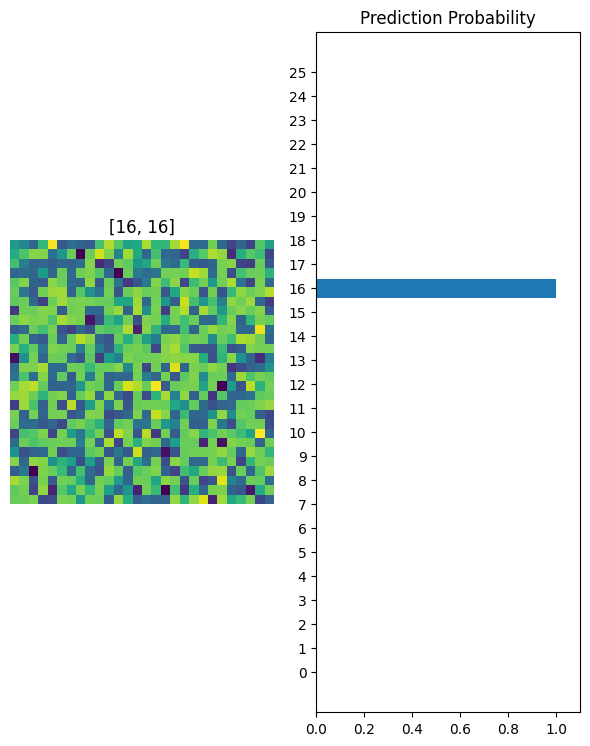

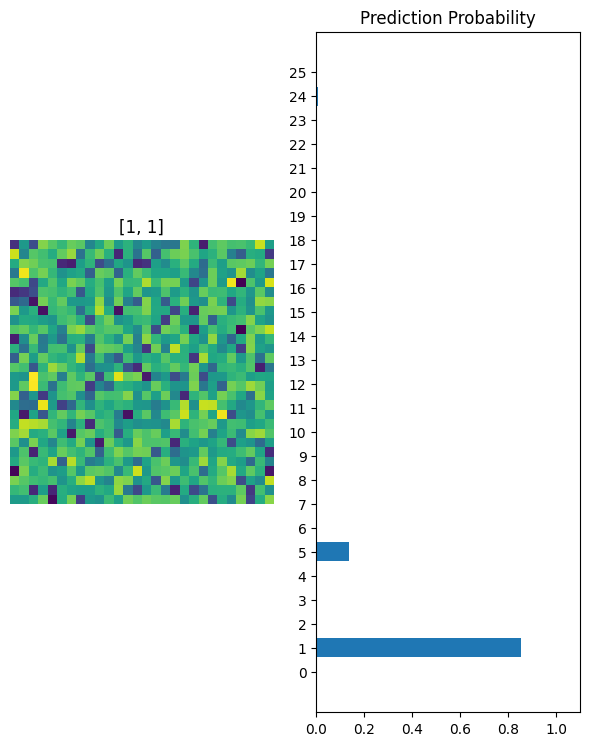

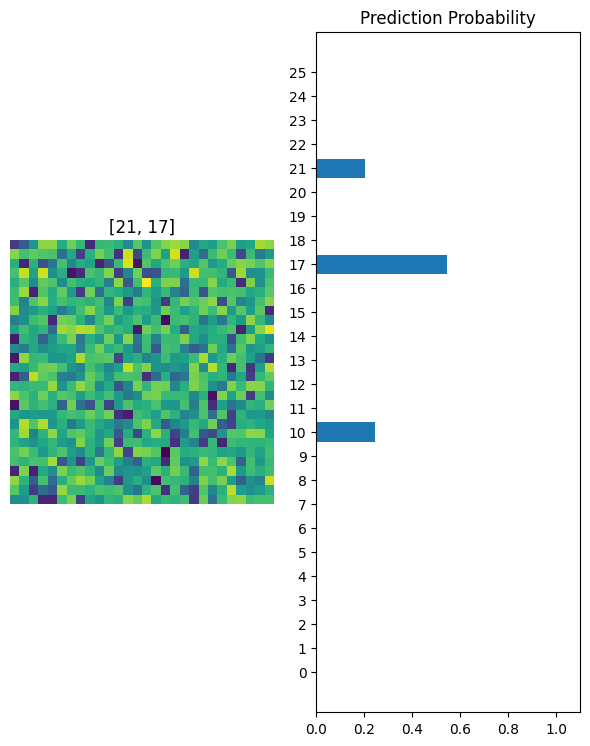

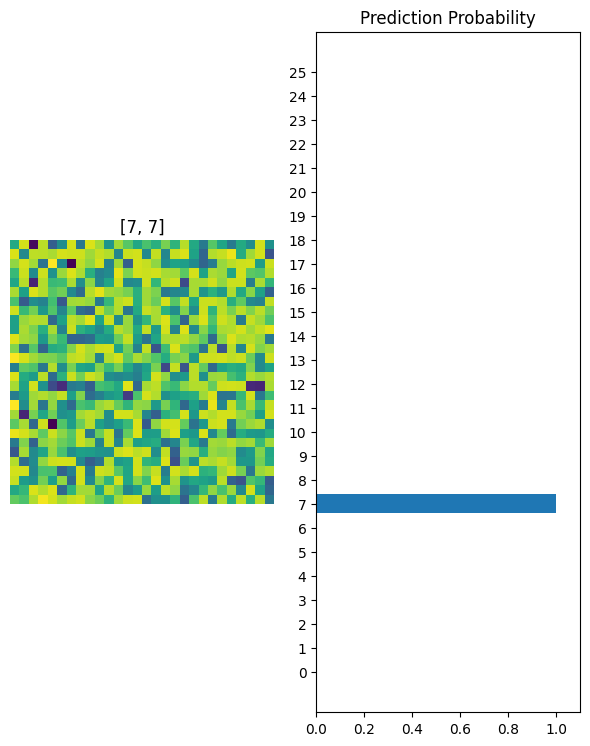

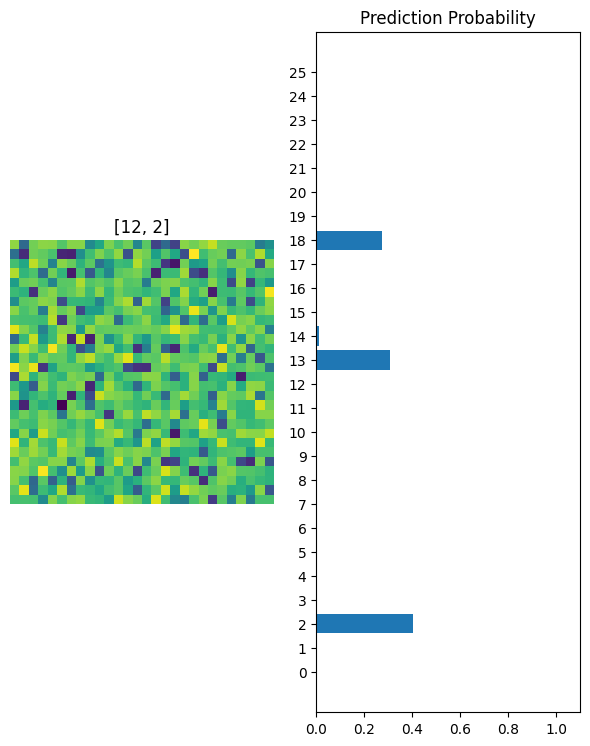

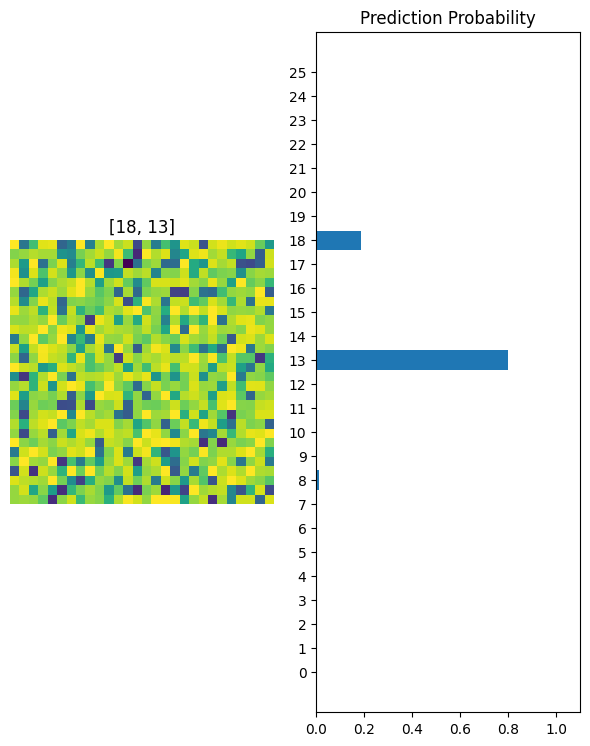

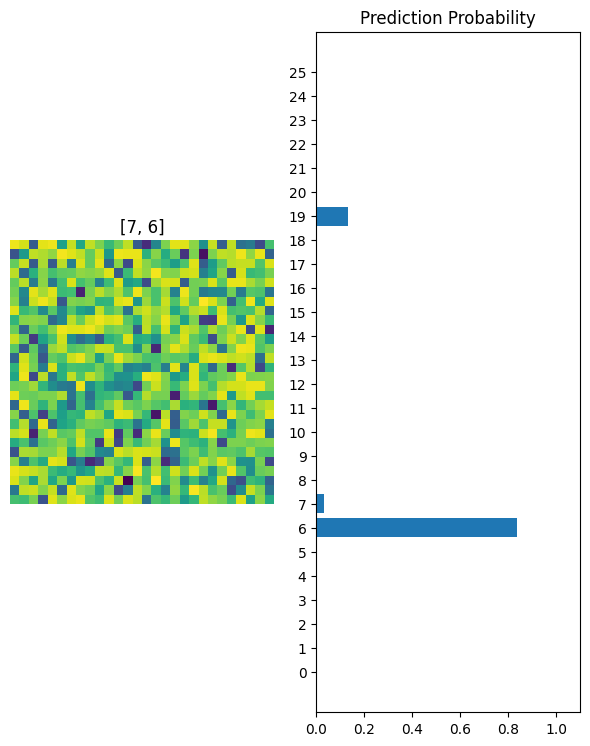

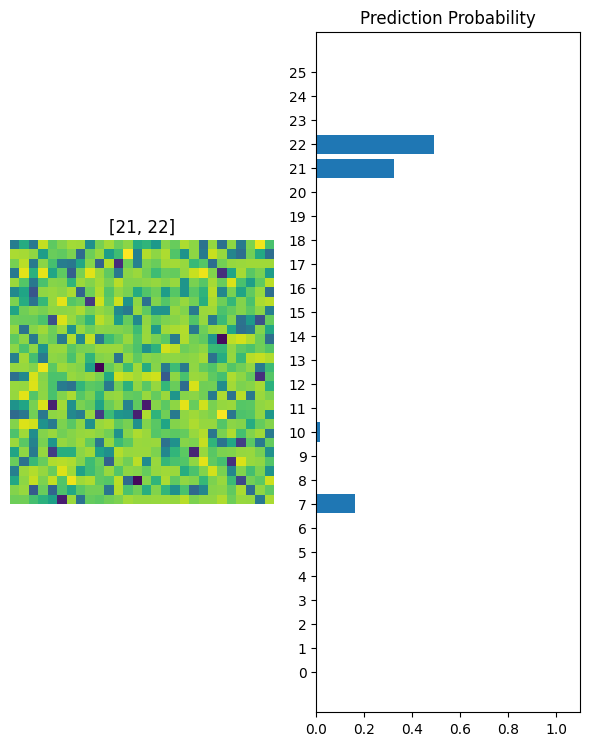

In [ ]:
model_cnn_3.to('cpu')

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))
image_batch_scramble = image_batch.view(-1, 28*28)
image_batch_scramble = image_batch_scramble[:, fixed_perm]
image_batch_scramble = image_batch_scramble.view(-1, 1, 28, 28)
# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_cnn_3(image_batch_scramble)
for i in range(26):
    img = image_batch[i]
    img_perm = image_batch_scramble[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img_perm, pred_prob, real_label)

# FGSM

In [ ]:
epsilons = [0, 0.001, 0.002, 0.004, 0.008, 0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.3]
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image using the gradients
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [-1,1] range
    perturbed_image = torch.clamp(perturbed_image, -1, 1)
    #perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

In [ ]:
def fgsm_test( model, device, test_loader, epsilon ):
    # Accuracy counter
    correct = 0
    adv_examples = []

    model.to(device)
    model.eval()

    progress_count = 0;
    # Loop over all examples in test set, one by one (test_loader has batch_size=1)
    for data, target in test_loader:
        progress_count+= 1

        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Zero all existing gradients
        model.zero_grad()
        # Forward pass the data through the model
        output = model(data)
        # Calculate the loss
        loss = F.nll_loss(output, target)
        # Calculate gradients of model in backward pass
        loss.backward()

        for i in range(len(target)):

        # Forward pass the data through the model
           # output = model(data)
            init_pred = output[i].max(0, keepdim=True)[1].squeeze() # get the index of the max log-probability
        #print(init_pred)

        # If the model is wrong, then this can't be an adversarial example, move on to the next example
            if init_pred.item() != target[i].item():
                continue

#         Calculate the loss
#             loss = F.nll_loss(output, target)
#          Calculate gradients of model in backward pass
#             loss.backward()
        # Collect gradients of the data
            data_grad = data.grad.data

        # Call FGSM Attack
            perturbed_data = fgsm_attack(data, epsilon, data_grad)
            perturbed_data = perturbed_data.to(device)

        # Apply the model to the perturbed image
            output = model(perturbed_data)
            final_pred = output[i].max(0, keepdim=True)[1] # get the index of the max log-probability

        # check if the perturbation forces a misclassification
            if final_pred.item() != target[i].item():
            # Save some adv examples for visualization later
                if len(adv_examples) < 10:
                    adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                    real_im = data.squeeze().detach().cpu().numpy()
                    adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex, real_im) )
            else:
                correct+= 1

            if progress_count % 1000 == 0:
                print('FGSM Attack Iteration: {}'.format(progress_count * len(data)))
            #print(init_pred.cpu().item(), target.cpu().item())

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(test_loader)*1000)
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct, len(test_loader)*1000, final_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

## FGSM for CNN

In [ ]:
accuracies = [] #list of accuracies
adv_examples = []

# Run test for each epsilon
for eps in epsilons:
    acc, ex = fgsm_test(model_cnn, device, test_loader, eps)
    accuracies.append(acc)
    adv_examples.append(ex)

Epsilon: 0	Test Accuracy = 2889 / 8000 = 0.361125
Epsilon: 0.001	Test Accuracy = 2871 / 8000 = 0.358875
Epsilon: 0.002	Test Accuracy = 2864 / 8000 = 0.358
Epsilon: 0.004	Test Accuracy = 2856 / 8000 = 0.357
Epsilon: 0.008	Test Accuracy = 2832 / 8000 = 0.354
Epsilon: 0.01	Test Accuracy = 2825 / 8000 = 0.353125
Epsilon: 0.02	Test Accuracy = 2746 / 8000 = 0.34325
Epsilon: 0.04	Test Accuracy = 2562 / 8000 = 0.32025
Epsilon: 0.08	Test Accuracy = 2194 / 8000 = 0.27425
Epsilon: 0.1	Test Accuracy = 1999 / 8000 = 0.249875
Epsilon: 0.2	Test Accuracy = 1335 / 8000 = 0.166875
Epsilon: 0.3	Test Accuracy = 1008 / 8000 = 0.126


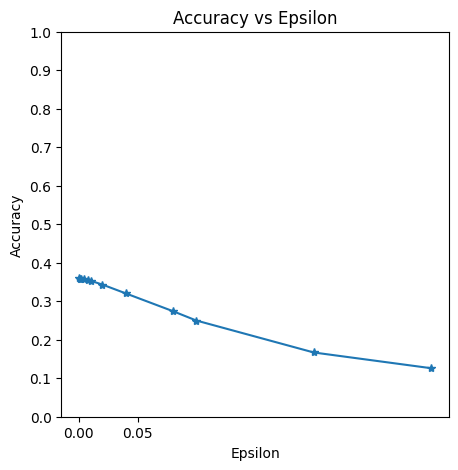

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .1, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

## FGSM for DNN

In [ ]:
accuracies = [] #list of accuracies
adv_examples = []

# Run test for each epsilon
for eps in epsilons:
    acc, ex = fgsm_test(model_fnn, device, test_loader, eps)
    accuracies.append(acc)
    adv_examples.append(ex)

Epsilon: 0	Test Accuracy = 1591 / 8000 = 0.198875
Epsilon: 0.001	Test Accuracy = 1583 / 8000 = 0.197875
Epsilon: 0.002	Test Accuracy = 1576 / 8000 = 0.197
Epsilon: 0.004	Test Accuracy = 1566 / 8000 = 0.19575
Epsilon: 0.008	Test Accuracy = 1541 / 8000 = 0.192625
Epsilon: 0.01	Test Accuracy = 1522 / 8000 = 0.19025
Epsilon: 0.02	Test Accuracy = 1436 / 8000 = 0.1795
Epsilon: 0.04	Test Accuracy = 1287 / 8000 = 0.160875
Epsilon: 0.08	Test Accuracy = 949 / 8000 = 0.118625
Epsilon: 0.1	Test Accuracy = 796 / 8000 = 0.0995
Epsilon: 0.2	Test Accuracy = 405 / 8000 = 0.050625
Epsilon: 0.3	Test Accuracy = 275 / 8000 = 0.034375


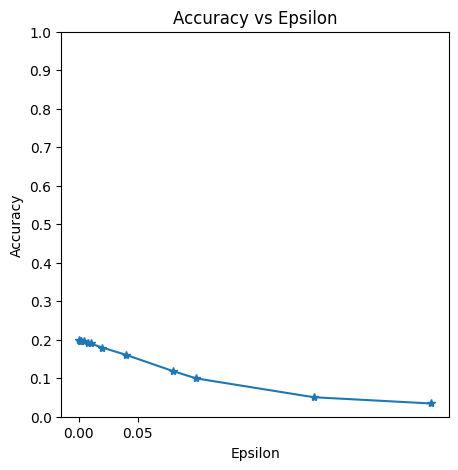

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .1, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()